# ML Insurance Classification Project

The following ficticious case study builds upon an example Kaggle datasets such as [Vehicle Insurance Fraud Detection](https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection/data).

## 1. Aims and Objectives and Plan

The aim of the case study is to develop and propose a machine learning model that can classify fraudulent and valid claims for an insurance company using provided assortment of data. The model should achieve target balanced error of 5%, that also considers the effects to the profitability and overall business operation.

This will be achieved by completing the following objectives:

- **Obj 1)** merge and pre-process the datasets
- **Obj 2)** evaluate the dataset, including outliers, class imbalance
- **Obj 3)** create a pipeline for training, testing and evalute machine learn models
- **Obj 4)** develop and optimise two machine learning models by training on the pre-processed
- **Obj 5)** develop a cost model using existing data available
- **Obj 6)** evaluate, analyse and propose a recommendation for classification model

## 2. Understanding the Case Study

The aim of the case study is to develop two classification machine learning models that can be evaluated on a provided dataset. A few requirements and targets for the model has been stated, and sample dataset has been provided to both develop and test the models.

### Data structure and pre-processing

For the case study, four seperate related datasets have been provided that cover insurance claims recorded for the first quarter of 2015, which mainly include policy holder information and the claim incident itself. These are mergeable  based on the 'CustomerID'. There is a selection of continious numerical data, discrete categorical and historical data, that requires encoding numerically and normalised to prevent training bias.

The data includes redundant data (non-descriptive columns and co-linear features),  missing values that will be either filled or dropped dependent on their count. Due to the nature of the case-study of fraudulent and valid claims, class imbalance will exist and balancing strategy will be needed to address the balance of the dataset in order to improve the model performance during training.

### Model development

The company requries the development and evaluation of two models capable of binary classification. An efficient approach is to use data pipelines to investigate the model's robustness during various data preprocesisng and training phases on different datasubsets, and an attempt to later optimise the overall classification performance through hyperparamter tuning.

### Cost Model Development

For fully evaluating the effect of the model's prediction performance on the business, a cost model is needed to be developed. This cost model is based using the existing dataset to predict the annual number of claims, costs due to fraudulent and valid claims paid out and potentially the impact on losing customers due to losing customers. The information provided is limited, so extra information requires to be collected and calculated from the provided dataset (e.g. number of customers, policy cost, average claim costs)

### Analysis
Additional functions are needed to routinely characterise the performance metrics of the two models, and visualise their prediction errors that later used for evaluating on the final cost model. These are ultimately identifying whether the model can achieve the overall balanced accuracy of 5%, but also calculating the model's impact on the business.

The overall structure of the model development is presented below to highlight the structure of the assignment and case study:

![alt text](images/diagram.png)

## 3. Pre-processing applied

### Import Python Packages


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# needed for pycharm
%matplotlib inline 

### Loading of Datasets
All the datasets from the .csv files are loaded

In [6]:
train_claim=pd.read_csv("Train_Claim.csv")
train_demograph=pd.read_csv("Train_Demographics.csv")
train_vehicle=pd.read_csv("Train_Vehicle.csv")
train_policy=pd.read_csv("Train_Policy.csv")
traindata_with_target=pd.read_csv("Traindata_with_Target.csv")
traindata_without_target=pd.read_csv("Traindata_withoutTarget.csv")

### Exploring the Datasets

The overall structure of each different datasets are explored, including the attributes to identify which data can be merged together.

In [7]:
train_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


In [8]:
train_demograph.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [9]:
train_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [10]:
train_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [11]:
traindata_with_target.head()

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


In [12]:
traindata_without_target.head()

,CustomerID,ReportedFraud
0,Cust20065,NaN
1,Cust37589,NaN
2,Cust24312,NaN
3,Cust5493,NaN
4,Cust7704,NaN


In [13]:
print("train_claim shape: ",train_claim.shape)
print("train_demograph shape: ",train_demograph.shape)
print("train_vehicle shape: ",train_vehicle.shape)
print("train_policy shape: ",train_policy.shape)
print("traindata_with_target shape: ",traindata_with_target.shape)
print("traindata_without_target shape: ",traindata_without_target.shape)

train_claim shape:  (28836, 19)
train_demograph shape:  (28836, 10)
train_vehicle shape:  (115344, 3)
train_policy shape:  (28836, 10)
traindata_with_target shape:  (28836, 2)
traindata_without_target shape:  (28836, 2)



### Merging the Datasets

The *pd.merge* function was used to merge our different data sets, using the '**CustomerID**' as the key for an 'inner' merge. Firstly, the vehicle data is pivoted from row to column representation.

In [14]:
train_vehicle['CustomerID'].value_counts()
pivoted_train_vehicle = train_vehicle.pivot(index='CustomerID', columns='VehicleAttribute', values='VehicleAttributeDetails')

In [15]:
# Merge train_claim and train_policy on CustomerID
train_claim_policy = pd.merge(train_claim,train_policy, on='CustomerID', how='inner')

# Merge the resulting dataframe with train_demograph on CustomerID
train_demographic = pd.merge(train_claim_policy, train_demograph, on='CustomerID', how='inner')

final_train_data = pd.merge(train_demographic, pivoted_train_vehicle, on='CustomerID', how='inner')

# Merge the final dataframe with traindata_with_target on CustomerID
df = pd.merge(final_train_data, traindata_with_target, on='CustomerID', how='inner')

# Display the first few rows of the final merged dataframe
df.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,armed-forces,movies,56700,-48500,India,Vehicle26917,Audi,A5,2008,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,tech-support,cross-fit,70600,-48500,India,Vehicle15893,Audi,A5,2006,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,armed-forces,polo,66400,-63700,India,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,armed-forces,polo,47900,-73400,India,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,exec-managerial,dancing,0,-41500,India,Vehicle28633,Toyota,CRV,2010,N


In [16]:
print("Merged dataframe df shape is: ",df.shape)

Merged dataframe df shape is:  (28836, 42)


The number of unique values exist for each categorical label are confirmed:

In [17]:
df.nunique()

CustomerID                    28836
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  4
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                     25
NumberOfVehicles                  4
PropertyDamage                    3
BodilyInjuries                    3
Witnesses                         5
PoliceReport                      3
AmountOfTotalClaim            21976
AmountOfInjuryClaim           11958
AmountOfPropertyClaim         11785
AmountOfVehicleDamage         20041
InsurancePolicyNumber         28836
CustomerLoyaltyPeriod           479
DateOfPolicyCoverage           6779
InsurancePolicyState              3
Policy_CombinedSingleLimit        9
Policy_Deductible              1496
PolicyAnnualPremium           23852
UmbrellaLimit                  7089
InsuredRelationship         


### Dropping Unnecessary Columns
Some columns contribute no meaningful data for so these are dropped on the following:

1) CustomerID
2) InsurancePolicyNumber
3) Country
4) AmountOfTotalClaim
5) Vehicle ID

These attributes are not relevant (ID, Policy Number and Vehicle ID are unique numbers with no meaning) for the analysis and can be dropped from the dataset. Country is all the same for the dataset, so this is removed. The 'AmountOfTotalClaim' is the sum of three other column attributes '(*AmountOfInjuryClaim*', '*AmountOfPropertyClaim*', '*AmountOfVehicleDamage*') and it is not necessary to include due to co-linearity.

In [18]:
#Check Country columns unique values
print(df['Country'].value_counts()) #All the same so we can drop this column

India    28834
Name: Country, dtype: int64


Drop these selected columns from the dataframe

In [19]:
# Drop unnecessary columns
df = df.drop(['CustomerID', 'InsurancePolicyNumber', 'Country', 'AmountOfTotalClaim', 'VehicleID'], axis=1)

### Data Formatting and Feature Engineering
Date features require conversion to a consistent numerical format, and is referenced against the earliest policy date, and the number of days is used. The days between incident and policy start date is  calculated as potential feature that may influence the validity of a claim.

In [20]:
# Convert the date columns to datetime format
df['DateOfIncident'] = pd.to_datetime(df['DateOfIncident'])
df['DateOfPolicyCoverage'] = pd.to_datetime(df['DateOfPolicyCoverage'])

# Record the number of datasets 
num_new_customers = df[df['DateOfPolicyCoverage'] > '01-01-2015'].shape[0]

In [21]:
# Calculate the number of days since a reference date from the earliest starting policy date
reference_date = df['DateOfPolicyCoverage'].min() # Earliest policy date 1990-01-07

df['DaysSinceIncident'] = (df['DateOfIncident'] - reference_date).dt.days
df['DaysSincePolicyCoverage'] = (df['DateOfPolicyCoverage'] - reference_date).dt.days

# Feature engineering - calculate the difference between the date the policy was taken and the date of incident
df['DaysBetweenIncidentAndPolicyStart'] = (df['DateOfIncident'] - df['DateOfPolicyCoverage']).dt.days

df = df.drop(['DateOfIncident', 'DateOfPolicyCoverage'], axis=1)


### Handling Missing and Duplicate Values

Within the provided data there is missing entries across some of the columns and potential duplicates require detecting and filtering. In the brief, these are specified by various placeholders and require dealing with:
 
 |    |              |
 |------------------------:|:-----------------------------------------------------------------------------------|
 | **TypeOfCollission**    | Type of Collision - the missing value is represented as “?” (23.6k left)           |
 | **IncidentTime**        | time of incident - the missing value is represented as *-5*                        |
 | **PropertyDamage**      | If property damage reported - missing value is represented as “?” (18377 left)     |
 | **Witnesses**           | Number of witnesses - missing value is represented as "MISSINGVALUE"  (28790 left) |
 | **PoliceReport**        | If police report available - “?” is the missing value (19031 left)                 |
 | **PolicyAnnualPremium** | Annual Premium – the missing value is represented as *-1*                          |
 | **InsuredGender**       | Gender - the missing value is represented as “NA” or null                          |

The number of rows identified with **“?”,"-1", “-5”,"MISSINGVALUE", “MISSEDDATA”** in any column of the dataset and later are processed to account for these separately:

In [22]:
missing_values = df.isin(['?', -5, 'MISSINGVALUE', 'MISSEDDATA', -1, np.nan]).sum()
missing_values[missing_values > 0].sort_values(ascending=False)

PropertyDamage         10459
PoliceReport            9805
TypeOfCollission        5162
PolicyAnnualPremium      141
Witnesses                 46
IncidentTime              31
InsuredGender             30
dtype: int64

There is many missing entries amongst '*TypeOfCollision*', '*PropertyDamage*', '*PoliceReport*' columns. Due to the overall
data loss from dropping all these rows, the empty rows will be filled with mode in the categorical columns  and with the mean in the numerical columns, after splitting into training and test datasets to prevent data leakage. However, for columns *InsuredGender*, *PolicyAnnualPremium*, *IncidentTime* and *Witnesses* all have relatively a small *combined* total missing values and therefore will be dropped.

In [23]:
# Drop rows with missing values in the train_claim dataset
df = df[~df['IncidentTime'].isin([-5])]
#df = df[~df['AmountOfTotalClaim'].isin(['MISSEDDATA'])] # This column is not needed as this is split into different claim amounts
df = df[~df['Witnesses'].isin(['MISSINGVALUE'])]
df = df.dropna(subset=['InsuredGender'])
df = df[~df['PolicyAnnualPremium'].isin([-1])]
# Check the shape of the dataframe after dropping missing values
df.shape

(28588, 38)

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Drop duplicate rows if any
df = df.drop_duplicates()
print('Dataframe shape: ', df.shape)

Missing values:
 TypeOfIncident                       0
TypeOfCollission                     0
SeverityOfIncident                   0
AuthoritiesContacted                 0
IncidentState                        0
IncidentCity                         0
IncidentAddress                      0
IncidentTime                         0
NumberOfVehicles                     0
PropertyDamage                       0
BodilyInjuries                       0
Witnesses                            0
PoliceReport                         0
AmountOfInjuryClaim                  0
AmountOfPropertyClaim                0
AmountOfVehicleDamage                0
CustomerLoyaltyPeriod                0
InsurancePolicyState                 0
Policy_CombinedSingleLimit           0
Policy_Deductible                    0
PolicyAnnualPremium                  0
UmbrellaLimit                        0
InsuredRelationship                  0
InsuredAge                           0
InsuredZipCode                       0
InsuredG

In [25]:
# Convert AmountOfTotalClaim, Witnesses and Policy_CombinedSingleLimit columns to int64
df['Witnesses'] = df['Witnesses'].astype("int64")

### Encoding Categorical Attributes
The categorical columns in the dataset are converted  into numerical format so that they can be used by the machine learning algorithms. The categorical attributes are  identified if the columns are of  an 'object' type:

In [26]:
df.dtypes

TypeOfIncident                        object
TypeOfCollission                      object
SeverityOfIncident                    object
AuthoritiesContacted                  object
IncidentState                         object
IncidentCity                          object
IncidentAddress                       object
IncidentTime                           int64
NumberOfVehicles                       int64
PropertyDamage                        object
BodilyInjuries                         int64
Witnesses                              int64
PoliceReport                          object
AmountOfInjuryClaim                    int64
AmountOfPropertyClaim                  int64
AmountOfVehicleDamage                  int64
CustomerLoyaltyPeriod                  int64
InsurancePolicyState                  object
Policy_CombinedSingleLimit            object
Policy_Deductible                      int64
PolicyAnnualPremium                  float64
UmbrellaLimit                          int64
InsuredRel

For encoding categorical columns, the **LabelEncoder** from **sklearn.preprocessing** was used, by applying this on each identified categorical column:

In [27]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

missing_value_columns = ['TypeOfCollission', 'PropertyDamage', 'PoliceReport']
# Remove missing_value_columns from categorical_cols
categorical_cols = [col for col in categorical_cols if col not in missing_value_columns]

label_encoders = {}
# Apply the LabelEncoder using fit_transform on each categorical column
for col in categorical_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

# Display the first few rows of the dataframe to verify the encoding
df

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,...,InsuredHobbies,CapitalGains,CapitalLoss,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud,DaysSinceIncident,DaysSincePolicyCoverage,DaysBetweenIncidentAndPolicyStart
0,0,Side Collision,2,4,4,0,279,17,3,?,...,12,56700,-48500,2,5,13,0,9158,3213,5945
1,0,Side Collision,2,4,4,4,279,10,3,YES,...,6,70600,-48500,2,5,11,0,9157,3965,5192
2,2,Side Collision,1,3,5,5,980,22,1,YES,...,14,66400,-63700,14,20,4,0,9139,4054,5085
3,2,Side Collision,1,3,6,5,980,22,1,YES,...,14,47900,-73400,14,20,8,0,9143,5573,3570
4,2,Rear Collision,1,1,5,5,624,10,1,NO,...,7,0,-41500,13,8,15,0,9133,2483,6650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,3,?,3,4,6,3,807,3,1,NO,...,17,0,0,12,19,12,0,9148,3023,6125
28832,2,Front Collision,1,1,5,2,996,17,1,YES,...,7,0,-28800,8,36,8,0,9164,5357,3807
28833,2,Rear Collision,1,1,6,6,405,1,1,YES,...,0,63100,-43800,12,21,9,0,9152,3168,5984
28834,2,Rear Collision,1,0,6,2,795,1,1,?,...,16,67400,-43800,12,15,9,0,9152,3137,6015


The data types of the columns are checked to determine if these are all numerical:

In [28]:
df.dtypes

TypeOfIncident                         int32
TypeOfCollission                      object
SeverityOfIncident                     int32
AuthoritiesContacted                   int32
IncidentState                          int32
IncidentCity                           int32
IncidentAddress                        int32
IncidentTime                           int64
NumberOfVehicles                       int64
PropertyDamage                        object
BodilyInjuries                         int64
Witnesses                              int64
PoliceReport                          object
AmountOfInjuryClaim                    int64
AmountOfPropertyClaim                  int64
AmountOfVehicleDamage                  int64
CustomerLoyaltyPeriod                  int64
InsurancePolicyState                   int32
Policy_CombinedSingleLimit             int32
Policy_Deductible                      int64
PolicyAnnualPremium                  float64
UmbrellaLimit                          int64
InsuredRel

The number of unique values exist for each categorical label are confirmed:

In [29]:
df.nunique()

TypeOfIncident                           4
TypeOfCollission                         4
SeverityOfIncident                       4
AuthoritiesContacted                     5
IncidentState                            7
IncidentCity                             7
IncidentAddress                       1000
IncidentTime                            24
NumberOfVehicles                         4
PropertyDamage                           3
BodilyInjuries                           3
Witnesses                                4
PoliceReport                             3
AmountOfInjuryClaim                  11912
AmountOfPropertyClaim                11742
AmountOfVehicleDamage                19930
CustomerLoyaltyPeriod                  479
InsurancePolicyState                     3
Policy_CombinedSingleLimit               9
Policy_Deductible                     1496
PolicyAnnualPremium                  23776
UmbrellaLimit                         7032
InsuredRelationship                      6
InsuredAge 

The target variable is **ReportedFraud** encoded to 0 and 1. 

| | |
|:-|:-|
|O | "Not Fraud" |
|1 |  "Fraud"|

In [30]:
#how many 0 and 1 in the target variable
df['ReportedFraud'].value_counts()

0    20869
1     7719
Name: ReportedFraud, dtype: int64

### Outlier Detection

Outliers are data points that significantly differ from the rest of the data in a dataset are identified and removed based on a Z-score criteria because they may adversely impact the training performance of machine learning models by introducing noise and bias. This section examines if these may potentially create problems in the data.

The distribution of the numerical columns is first used to visually identify outliers present in the dataset


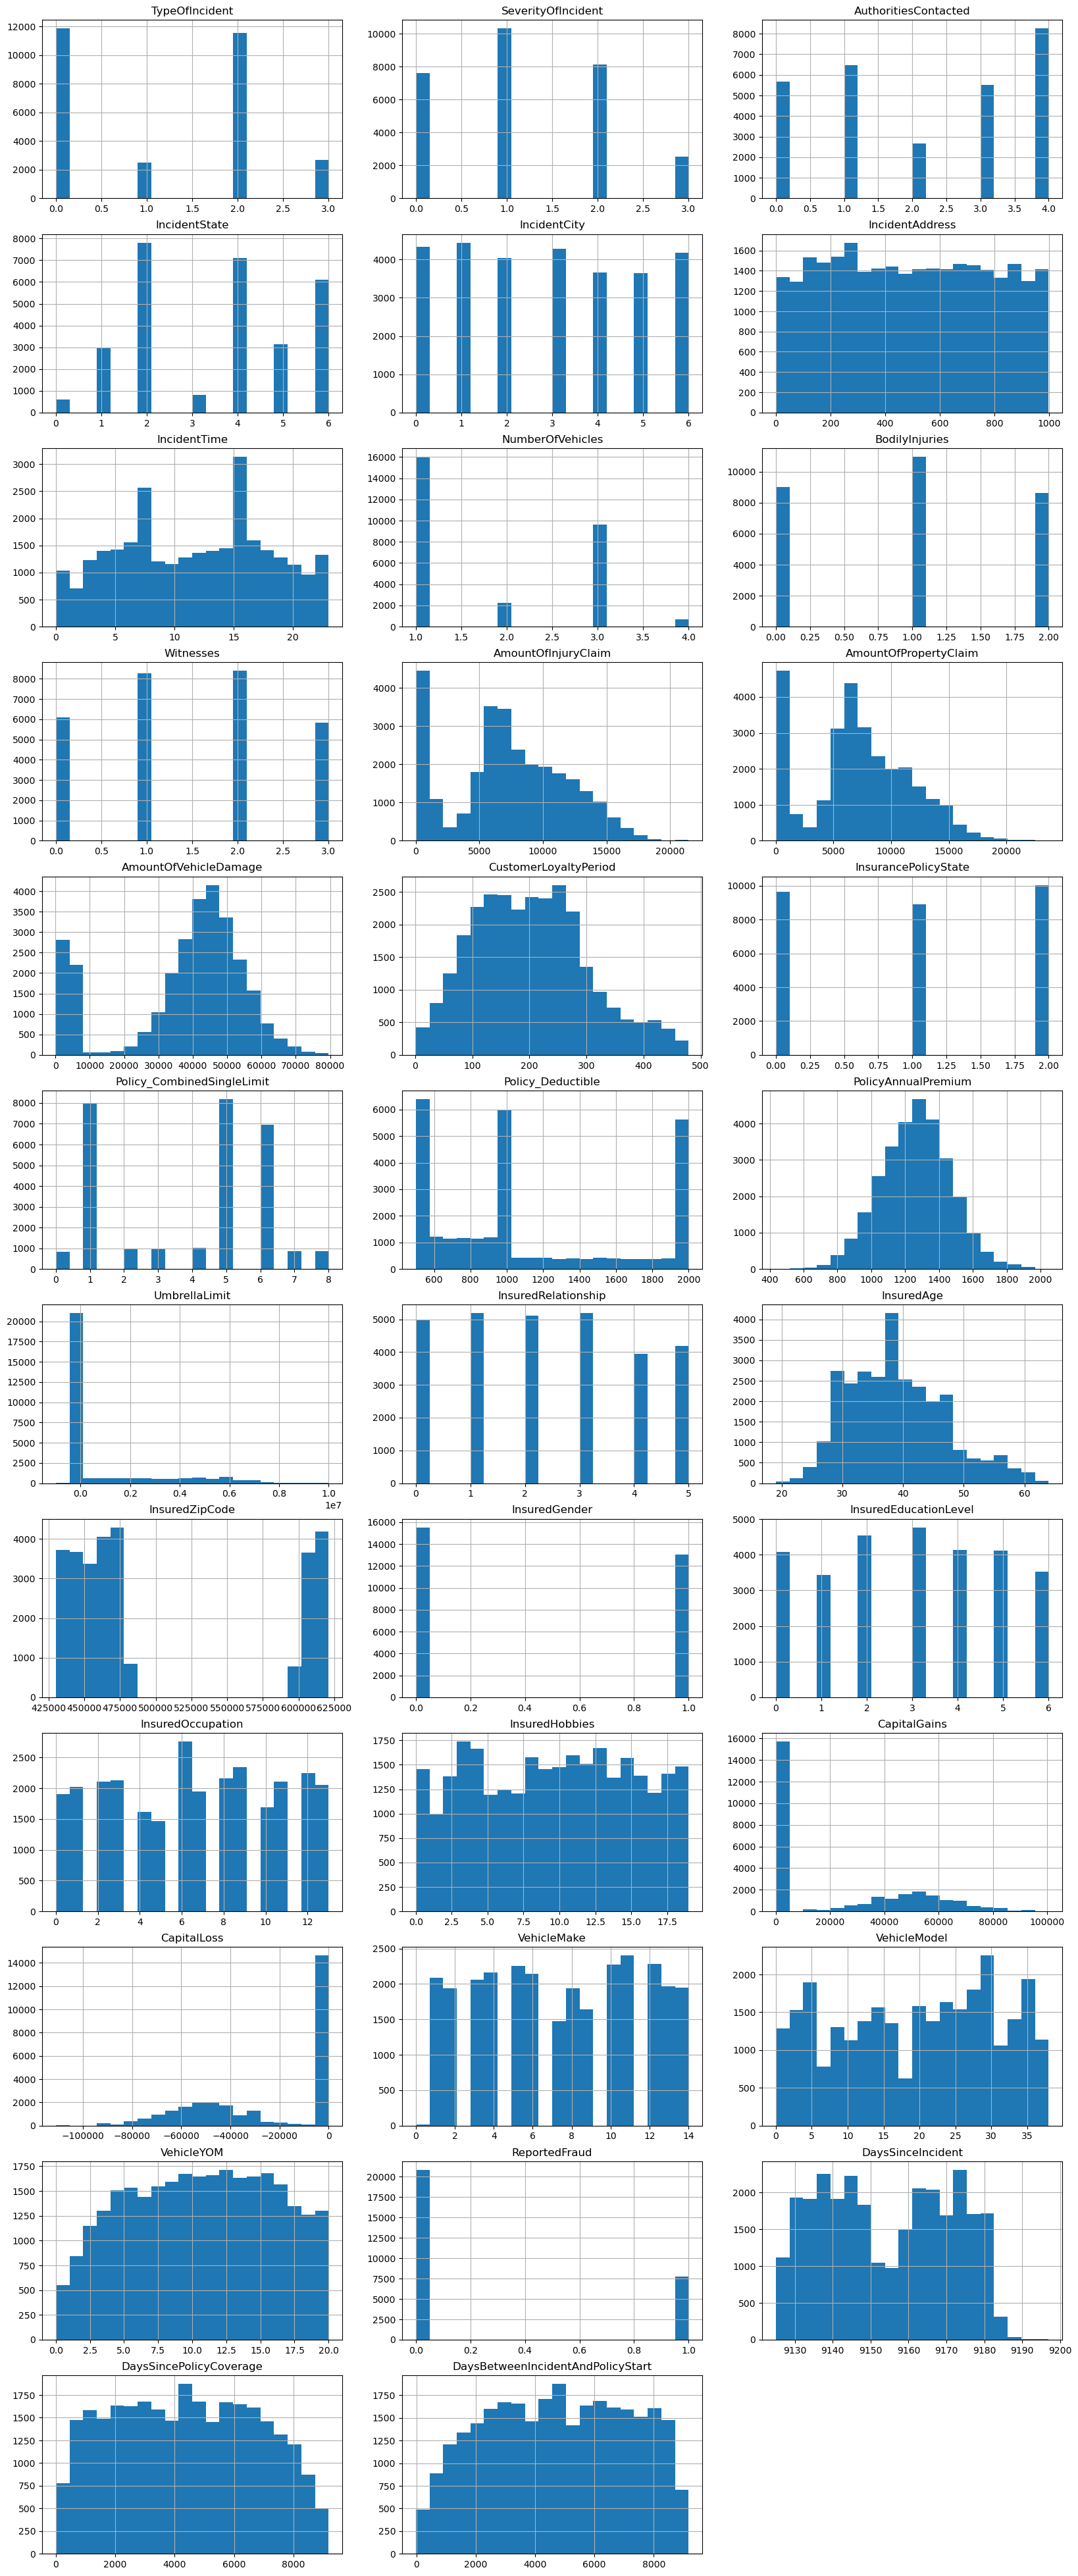

In [39]:
# find numerical columns
numerical_cols = df.select_dtypes(include=['int64','int32', 'float64']).columns

# Plot the distribution of numerical columns
plt.figure(figsize=(20, 50))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    df[col].hist(bins=20)
    plt.title(col)


Some attributes appear to show outliers. The Z-score method was used detect and potentially remove the outliers in the dataset. Data points with a Z-score greater than 3 or less than -3 tend to be typically considered outliers in data that are normally distribution.

In [37]:
# Calculate the Z-scores for each numerical column
z_scores = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

# Identify the rows with outliers beyond 3 Std. Deviations
outliers = (z_scores > 3) | (z_scores < -3)

# Display the number of outliers that are fraudulent
numOutliers = outliers.any(axis=1).sum()
numFraudOutliers = len(df[outliers.any(axis=1)][df['ReportedFraud']==1])
print('Proportion of Fraudulent Outliers: {}/{}'.format(numFraudOutliers,numOutliers))

# sort the number of outliers identified
sumOutliers = outliers.sum().sort_values(ascending=False)
sumOutliers[sumOutliers > 0]

Proportion of Fraudulent Outliers: 275/697


C:\Users\tugba\AppData\Local\Temp\ipykernel_28620\125944836.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  numFraudOutliers = len(df[outliers.any(axis=1)][df['ReportedFraud']==1])


UmbrellaLimit            474
PolicyAnnualPremium      111
AmountOfPropertyClaim     53
InsuredAge                23
CapitalLoss               22
AmountOfInjuryClaim       14
dtype: int64

In [377]:
# Remove the rows with outliers (copy)
df_cleaned = df[~outliers.any(axis=1)]

# Display the shape of the cleaned DataFrame
print("Number of rows (original): {}, (cleaned): {} ".format( len(df), len(df_cleaned)))

Number of rows (original): 28588, (cleaned): 27891 


A histogram across all the dataset attributes are used to check if it is normally distributed

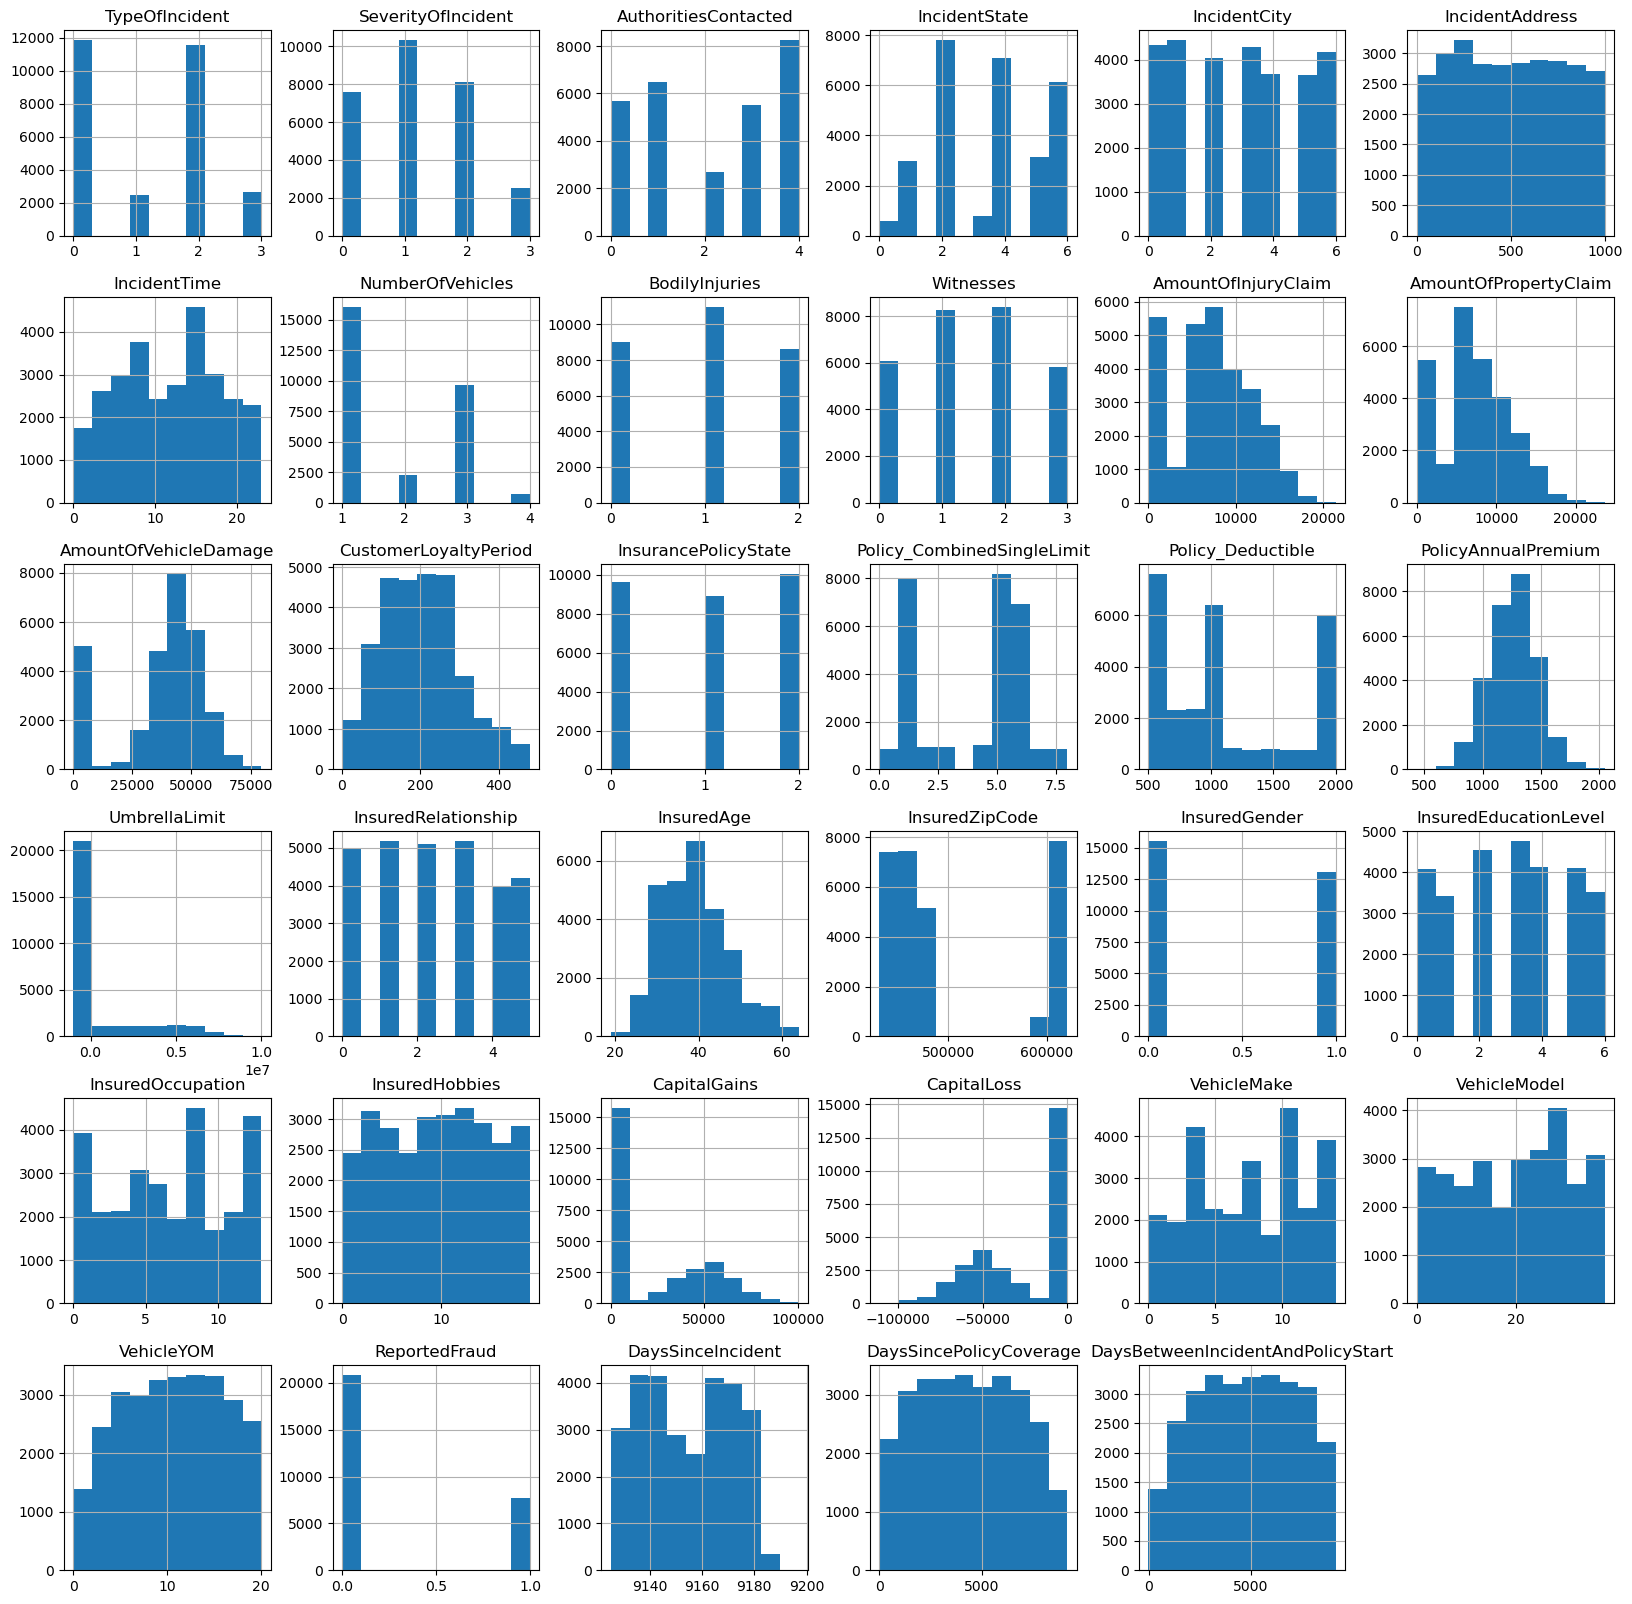

In [40]:
fig = df.hist(figsize=(20, 20))
plt.show()

Outliers are predominantly encountered in the '*UmbrellaLimit*', '*PolicyAnnualPremium*'  and '*AmountOfPropertyClaim*' columns. However, it can be seen that there is generally a broad spread of values representative in the data. Additionally, an equal proportion of outliers are fraduluent therefore it is likely to affect the classification prediction performance later if outliers are encountered.

### Rescaling of Attributes

Before selecting the rescaling transformation later, the minimum and maximum values of the columns are used to identify which scaler to use.


In [379]:
df.describe()

,TypeOfIncident,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,...,InsuredHobbies,CapitalGains,CapitalLoss,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud,DaysSinceIncident,DaysSincePolicyCoverage,DaysBetweenIncidentAndPolicyStart
count,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,...,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000,28588.000000
mean,1.175878,1.195537,2.146355,3.565762,2.914370,495.632153,11.759619,1.823317,0.986568,1.488981,...,9.596544,23078.312579,-24947.502449,7.518154,19.642997,10.089373,0.270008,9154.333532,4380.265111,4774.068420
std,1.077954,0.930565,1.532540,1.782026,2.018805,286.502437,6.148038,0.979993,0.784885,1.040905,...,5.692677,27641.232480,27917.781526,4.060150,11.161795,5.310819,0.443972,16.833486,2397.182499,2395.992039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,9125.000000,0.000000,-20.000000
25%,0.000000,0.000000,1.000000,2.000000,1.000000,248.000000,6.000000,1.000000,0.000000,1.000000,...,4.000000,0.000000,-50000.000000,4.000000,10.000000,6.000000,0.000000,9139.000000,2356.000000,2791.000000
50%,1.000000,1.000000,2.000000,4.000000,3.000000,491.500000,12.000000,1.000000,1.000000,1.000000,...,10.000000,0.000000,0.000000,8.000000,20.000000,10.000000,0.000000,9154.000000,4343.000000,4810.000000
75%,2.000000,2.000000,4.000000,5.000000,5.000000,742.000000,17.000000,3.000000,2.000000,2.000000,...,14.000000,49000.000000,0.000000,11.000000,29.000000,15.000000,1.000000,9170.000000,6371.000000,6798.000000
max,3.000000,3.000000,4.000000,6.000000,6.000000,999.000000,23.000000,4.000000,2.000000,3.000000,...,19.000000,100500.000000,0.000000,14.000000,38.000000,20.000000,1.000000,9197.000000,9177.000000,9176.000000


In [380]:
# Find the minimum and maximum values of the columns
df.describe().loc[['min', 'max']]

,TypeOfIncident,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,...,InsuredHobbies,CapitalGains,CapitalLoss,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud,DaysSinceIncident,DaysSincePolicyCoverage,DaysBetweenIncidentAndPolicyStart
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-111100.0,0.0,0.0,0.0,0.0,9125.0,0.0,-20.0
max,3.0,3.0,4.0,6.0,6.0,999.0,23.0,4.0,2.0,3.0,...,19.0,100500.0,0.0,14.0,38.0,20.0,1.0,9197.0,9177.0,9176.0


By looking at the previous dataframe histograms, the majority of the data is not normally distributed. Therefore, the MinMaxScaler was used to scale the data. Following the split between training and test data, the *MinMaxScaler*  in *sklearn.preprocessing* was used to transform this between 0 and 1 to ensure all features equally contribute to the model's training.


### e. Check the Balance of the Target Variable

The target variable in our dataset is **ReportedFraud**, which indicates whether a car insurance claim is fraudulent or not. The target variable is binary, with 0 representing "Not Fraud" and 1 representing "Fraud".

The balance of the target variable by calculating the percentage of each class in the dataset. A balanced dataset has an equal number of instances for each class, while an imbalanced dataset has a significant difference in the number of instances between classes.

Target variable balance as a percentage is: 27.0%


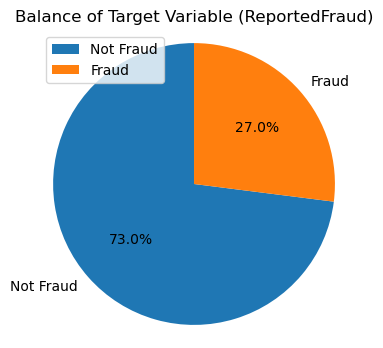

In [43]:
# Check the balance of the target variable (ReportedFraud) in the dataset as a percentage
target_balance = df['ReportedFraud'].value_counts(normalize=True) * 100

plt.figure(figsize=(4, 4))
plt.pie(target_balance, labels=["Not Fraud", "Fraud"], autopct='%1.1f%%', startangle=90) #0 is not fraud, 1 is fraud
plt.legend(["Not Fraud", "Fraud"], loc="upper left")
plt.axis('equal')
plt.title("Balance of Target Variable (ReportedFraud)")

print(f"Target variable balance as a percentage is: {target_balance[1.0]:.1f}%")

It is seen that the target variable is imbalanced, with approximately 73.0% of the claims labeled as "Not Fraud" and only 27% labeled as "Fraud". These imbalanced datasets can lead to biased models that perform poorly on the minority class. This was addressed before training the machine learning, and is presented in the next section, following splitting the data.

In [382]:
# Save the pre-processed dataset
df.to_csv("preprocessed_data.csv", index=False)

### Cost Model

The cost model for the company has been stated that the gross annual profit must be 2x the annual cost of claims to meet overheads processing them. The cost model 

The first stage is calculated the total average claim costs based on the number of claims and the total value for each claim: 

In [119]:
# Calculate the average fraud cost from all claims (whether fraudulent or not)
policy_annual_premium_mean = df['PolicyAnnualPremium'].mean()
total_valid_claims = (df['ReportedFraud'] == 0).count()
total_claims = df.shape[0]

print('Customer loyalty period (years): {:2.1f}'.format( df['CustomerLoyaltyPeriod'].mean()/12))

average_claim_cost = df[['AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage']]

average_claim_cost_valid = average_claim_cost[df['ReportedFraud'] == 0].mean().sum()
average_claim_cost_fraud = average_claim_cost[df['ReportedFraud'] == 1].mean().sum()
average_claim_cost = average_claim_cost.mean().sum()

print(f"Average Claim Cost (fraud claim):: {average_claim_cost_fraud:4.0f}")
print(f"Average Claim cost (valid claim): {average_claim_cost_valid:4.0f}")
print(f"Average Claim Cost (all): {average_claim_cost:4.0f}")

Customer loyalty period (years): 16.9
Average Claim Cost (fraud claim):: 58777
Average Claim cost (valid claim): 49921
Average Claim Cost (all): 52312


The total estimate number of customers is calculated based on the number of claims across the entire year, and assumption that number of claims are 10% of the the total customer base. From this, the overall average policy cost is calculated for estimating the annual revenue.

In [121]:
# Overall percentage of fraudulent cases detected in 3 momnths
pctFraud = df['ReportedFraud'].sum()/df['ReportedFraud'].count()

# Assume the total number of claims has occured in Q1 (Quarter)
total_annual_claims = total_claims * 4
total_valid_annual_claims = total_valid_claims * 4
total_claim_cost = average_claim_cost_valid * total_valid_annual_claims

# Next section calculates the total revenue and the estimate mean policy cost
total_customers = total_annual_claims / 0.1

# assumed new customers are related to number of claims
annual_new_customers = num_new_customers * 4 / 0.1
gross_profit = 2 * total_claim_cost
total_revenue = gross_profit + total_claim_cost
policy_cost = total_revenue/total_customers

print(f"Total Customers: {total_customers:3.0f}")
print(f"Average New Customers (Annual): {annual_new_customers}")
print(f"Valid Claims (3 Months): {total_valid_claims:3.0f}")
print(f"Total Annual Claims: {total_annual_claims:3.0f}")
print(f"Mean Policy Cost (Est.): {policy_cost:3.0f}")
print(f"Mean Policy Cost (Actual): {policy_annual_premium_mean*12:3f}")
print(f"Total Revenue: {total_revenue:e}")
print(f"Total Costs: {total_claim_cost:e}")

Total Customers: 1143520
Average New Customers (Annual): 1040.0
Valid Claims (3 Months): 28588
Total Annual Claims: 114352
Mean Policy Cost (Est.): 14976
Mean Policy Cost (Actual): 15141.241440
Total Revenue: 1.712562e+10
Total Costs: 5.708539e+09


Finally, the business cost and revenue based on later model predictions are formed. The business costs are based on the error rates from confusion matrices that are calculated from model predictions. The number of customers is also provided to estimate the total annual claims in that year. The overall business cost is calculated by the number of claims (TN and FN) and corresponding average claim cost. 

In [114]:
# The actual cost to the business
def calculateBusinessCost(trueNeg, falsePos,
                          falseNeg, truePos, num_customers):

    # Calculate the anticipate number of annual claims based on total number of customers
    num_annual_claims = num_customers * 0.1

    # Calculate the total number of claims for each situation
    total_fraud_claims = num_annual_claims * falseNeg
    total_fraud_denied_claims = truePos # not used
    total_lost_customers = num_annual_claims * falsePos # not used
    total_valid_claims = num_annual_claims * trueNeg

    # Calculate the business cost and predicted revenue
    business_cost_invalid = total_fraud_claims*average_claim_cost_fraud
    business_cost_valid = total_valid_claims*average_claim_cost_valid

    return business_cost_invalid, business_cost_valid

The ``calculateRevenue`` function uses the same metrics from the confusion matrix to forecast the total revenue and business costs iteratively across a number of ``years``. The ``churn_rate`` is a constant factor indicates the change on total_customers. This is calculated based on the predicted total lost customers and annual new customers for the first/current year. The annual customer is forecasted and based on this the business cost and annual revenues are calculated. 

In [113]:
# The revenue generated forecasted across years
def calculateRevenue(trueNeg, falsePos, falseNeg, truePos, years):

    # Calculate the total number of claims for each situation
    total_fraud_claims = total_annual_claims * falseNeg
    total_fraud_denied_claims = truePos # not used
    total_lost_customers = total_annual_claims * falsePos

    total_valid_claims = total_annual_claims * trueNeg

    # The churn rate is considered constant
    churn_rate = (total_customers - total_lost_customers+annual_new_customers) / total_customers
    total_costs = []
    total_revenue = []
    num_customers = [total_customers]

    for i in range(years):
        # Calculate number of cusomters
        annual_customers = num_customers[-1] * churn_rate
        num_customers.append(annual_customers)

        # Predict the annual revenue based on the reduction in cusstomers
        annual_revenue = policy_cost * annual_customers
        total_revenue.append(annual_revenue)

        # predict the annual costs
        annual_cost = calculateBusinessCost(trueNeg=trueNeg, falsePos=falsePos,
                                            falseNeg=falseNeg, truePos=truePos,
                                            num_customers=annual_customers)
        total_costs.append(annual_cost)

    return total_revenue, total_costs, annual_customers

These functions are used in the final section for analysing the overall impact of the models on the business.

### Splitting Data between Training and Test

The pre-processed data was split into training and testing sets. This is done before filling missing values and scaling to prevent data leakage. For training the models, cross validation was used to further split the training data. Stratification was used to ensure that the class balance was maintained on the target variable.

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop('ReportedFraud', axis=1) # attributes
y = df['ReportedFraud']

# The data was split into training and testing sets (80% training, 20% testing)
# stratify=y ensures that the class balance is maintained in the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39, stratify=y)

print("Training set shape:", len(X_train))
print("Testing set shape:", len(X_test))

Training set shape: 22870
Testing set shape: 5718


### Fixing Missing Values in the Training and Test Dataset

Previously, there were many missing values in the type of *collision*, *property damage* and *police report* columns which is recorded as “?” in the raw data. The missing values were filled with the mode of the training set as those columns were including categorical values. The calculated modal value of the training set was also used to fill the missing values in the test set later to further prevent data leakage. This is to ensure that the missing values are filled with the most common value in the training set, which is the recommended approach to maintain consistency across the datasets.

In [45]:
# Fill missing values in the selected columns with the mode or its calculated valued
def fill_missing_with_mode(df, columns, mode_values=None):

    # Calculate the mode values dictionary (key=column) if not provided for each column
    if mode_values is None:
        # Find the mode_values for the column in the training set but exclude entries with "?"
        mode_values = {column: df[column][df[column] != '?'].mode()[0] for column in columns}

    # Replace missing values with the mode in the dictionary
    for column in columns:
        df[column].replace('?', mode_values[column], inplace=True)

    return df, mode_values

# Columns with missing values represented as "?"
missing_value_columns = ['TypeOfCollission', 'PropertyDamage', 'PoliceReport']

# Fill missing values only in the training set and get the mode values to prevent data leakage
X_train, mode_values = fill_missing_with_mode(X_train, missing_value_columns) # Fill missing values in the training set

# Fill missing values in the validation and test sets using the mode values from the training set
#X_val, _ = fill_missing_with_mode(X_val, missing_value_columns, mode_values)
X_test, _ = fill_missing_with_mode(X_test, missing_value_columns, mode_values)

#check the missing values in the training set represented as "?"
print(X_train.isin(['?']).sum())

#check the missing values in the test set represented as "?"
print('**********************************\n',X_test.isin(['?']).sum())

TypeOfIncident                       0
TypeOfCollission                     0
SeverityOfIncident                   0
AuthoritiesContacted                 0
IncidentState                        0
IncidentCity                         0
IncidentAddress                      0
IncidentTime                         0
NumberOfVehicles                     0
PropertyDamage                       0
BodilyInjuries                       0
Witnesses                            0
PoliceReport                         0
AmountOfInjuryClaim                  0
AmountOfPropertyClaim                0
AmountOfVehicleDamage                0
CustomerLoyaltyPeriod                0
InsurancePolicyState                 0
Policy_CombinedSingleLimit           0
Policy_Deductible                    0
PolicyAnnualPremium                  0
UmbrellaLimit                        0
InsuredRelationship                  0
InsuredAge                           0
InsuredZipCode                       0
InsuredGender            

Finally, the labels for missing_value_columns are encoded, which was not done previously due to filling missing values.

In [46]:
label_encoder_missing = LabelEncoder()
# Apply the LabelEncoder using fit_transform on each categorical column
for col in missing_value_columns:
     # Apply the LabelEncoder to missing filling columns and apply transform seperately to both the training and test sets
     label_encoder_missing.fit(X_train[col])
     X_train[col] = label_encoder_missing.transform(X_train[col])
     X_test[col] = label_encoder_missing.transform(X_test[col])

 Missing values in the training set was filled with their mode, and this was seperately used to fill in  missing values in the validation and test sets to prevent data leakage. For the columns with missing data, these are encoded using ``LabelEncoder`` to convert these to numerical categorical labels.

### Transform the Datasets
The ``MinMax`` scaler is used to transform the dataset. The min and max values are calculated using the training dataset (``X_train``) and applied across both the training and test sets to ensure that the data is scaled consistently across both sets, and prevents data leakage.

In [47]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data based on min-max transform across both training and data sets separately
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-create the pandas data frames and include the column names and original indices, for merging later
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns,  index=X_test.index)

# Check the scaled values
X_train
X_test

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,...,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,VehicleMake,VehicleModel,VehicleYOM,DaysSinceIncident,DaysSincePolicyCoverage,DaysBetweenIncidentAndPolicyStart
22389,0.666667,0.0,0.666667,0.00,0.666667,0.833333,0.090090,0.347826,0.000000,1.0,...,0.692308,0.157895,0.000000,1.000000,0.785714,0.131579,0.25,0.777778,0.307290,0.693889
26885,0.666667,1.0,0.666667,1.00,0.666667,0.166667,0.903904,0.565217,0.000000,0.0,...,0.461538,0.315789,0.000000,1.000000,0.357143,0.184211,0.65,0.208333,0.257274,0.739343
19229,1.000000,0.5,1.000000,0.50,0.333333,0.000000,0.188188,0.217391,0.000000,0.0,...,0.230769,0.736842,0.000000,1.000000,0.142857,0.578947,0.65,0.236111,0.183720,0.812962
9462,0.000000,0.0,0.000000,0.00,0.333333,0.500000,0.116116,0.086957,0.666667,0.0,...,0.307692,0.947368,0.511443,0.423942,0.428571,0.500000,0.90,0.055556,0.085758,0.909308
15092,1.000000,0.5,0.333333,0.50,0.666667,0.666667,0.357357,0.391304,0.000000,0.0,...,0.230769,0.368421,0.267662,0.502250,1.000000,0.605263,1.00,0.458333,0.554865,0.444324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27773,1.000000,0.5,1.000000,1.00,1.000000,0.166667,0.945946,0.695652,0.000000,0.0,...,0.000000,0.157895,0.000000,1.000000,0.071429,0.605263,0.75,0.041667,0.447423,0.548282
1336,0.666667,0.5,0.666667,0.25,0.666667,0.000000,0.230230,0.956522,0.000000,1.0,...,1.000000,0.947368,0.507463,1.000000,0.071429,0.605263,0.15,0.597222,0.290400,0.709330
3878,1.000000,0.5,0.333333,1.00,1.000000,0.666667,0.703704,0.130435,0.000000,1.0,...,0.615385,0.578947,0.523383,1.000000,0.500000,0.263158,0.40,0.486111,0.024082,0.974228
8581,0.000000,1.0,0.666667,0.00,1.000000,0.166667,0.125125,0.434783,0.333333,0.0,...,0.000000,0.684211,0.000000,1.000000,0.285714,0.052632,0.90,0.652778,0.644546,0.356351


The datasets are concatenated for use in pipelines and saved for later if needed

In [49]:
# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

### Oversampling the Minority Class in the Training Set

Previously, the balance of the target variable in the dataset and found that it is imbalanced. To address this class imbalance, the minority class in the training set will be oversampled. It is better to oversample the minority class in the training set only, otherwise include these in the test set could create bias. It is desirable to not lose a significant amount of data from the majority class.

Oversampling the minority class is a better option because the dataset is not very large and is able to reduce information loss by undersampling the majority class. ``Resample`` is used with replacement to match the number of samples in the *majority* class.

In [50]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = train_data[train_data['ReportedFraud'] == 0]
minority_class = train_data[train_data['ReportedFraud'] == 1]

# Oversample the minority class (fraudulent)
minority_class_oversampled = resample(minority_class,
                                      replace=True, # Sample with replacement
                                      n_samples=len(majority_class), # Match number in majority class
                                      random_state=39)

# Combine the oversampled minority class with the majority class
train_data_oversampled = pd.concat([majority_class, minority_class_oversampled])

# Separate the features and target variable
X_train_oversampled = train_data_oversampled.drop('ReportedFraud', axis=1)
y_train_oversampled = train_data_oversampled['ReportedFraud']

# Display the shapes of the resulting datasets
print("Training set shape:", X_train_oversampled.shape, y_train_oversampled.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Export as a CSV file for seperate processing later
train_data_oversampled.to_csv("train_data_oversampled.csv", index=False)


Training set shape: (33390, 37) (33390,)
Testing set shape: (5718, 37) (5718,)


Check the balance of the target variable in the oversampled training set

In [52]:
target_balance_oversampled = y_train_oversampled.value_counts(normalize=True) * 100
print(f"Target variable balance in the oversampled training set as a percentage is:\n{target_balance_oversampled}")

target_balance_test = y_test.value_counts(normalize=True) * 100
print(f"Target variable balance in the test set as a percentage is:\n{target_balance_test}")

Target variable balance in the oversampled training set as a percentage is:
0    50.0
1    50.0
Name: ReportedFraud, dtype: float64
Target variable balance in the test set as a percentage is:
0    72.997552
1    27.002448
Name: ReportedFraud, dtype: float64


The minority class for the target variable in the training has been oversampled to be approximately 50% for each class. 
It is important to note that oversampling the minority class would lead to overfitting if we oversampled on the test sets as well.

### Feature Selection

Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used to identify the most important features that can help improve the performance of machine learning models by reducing the dimensionality of the data and removing irrelevant or redundant features.

#### Feature Selection using Correlation

The correlation matrix was obtained using Spearman's Rank method, and plotted to identify relationship between features of the dataset.

C:\Users\tugba\AppData\Local\Temp\ipykernel_28620\810598473.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='spearman')


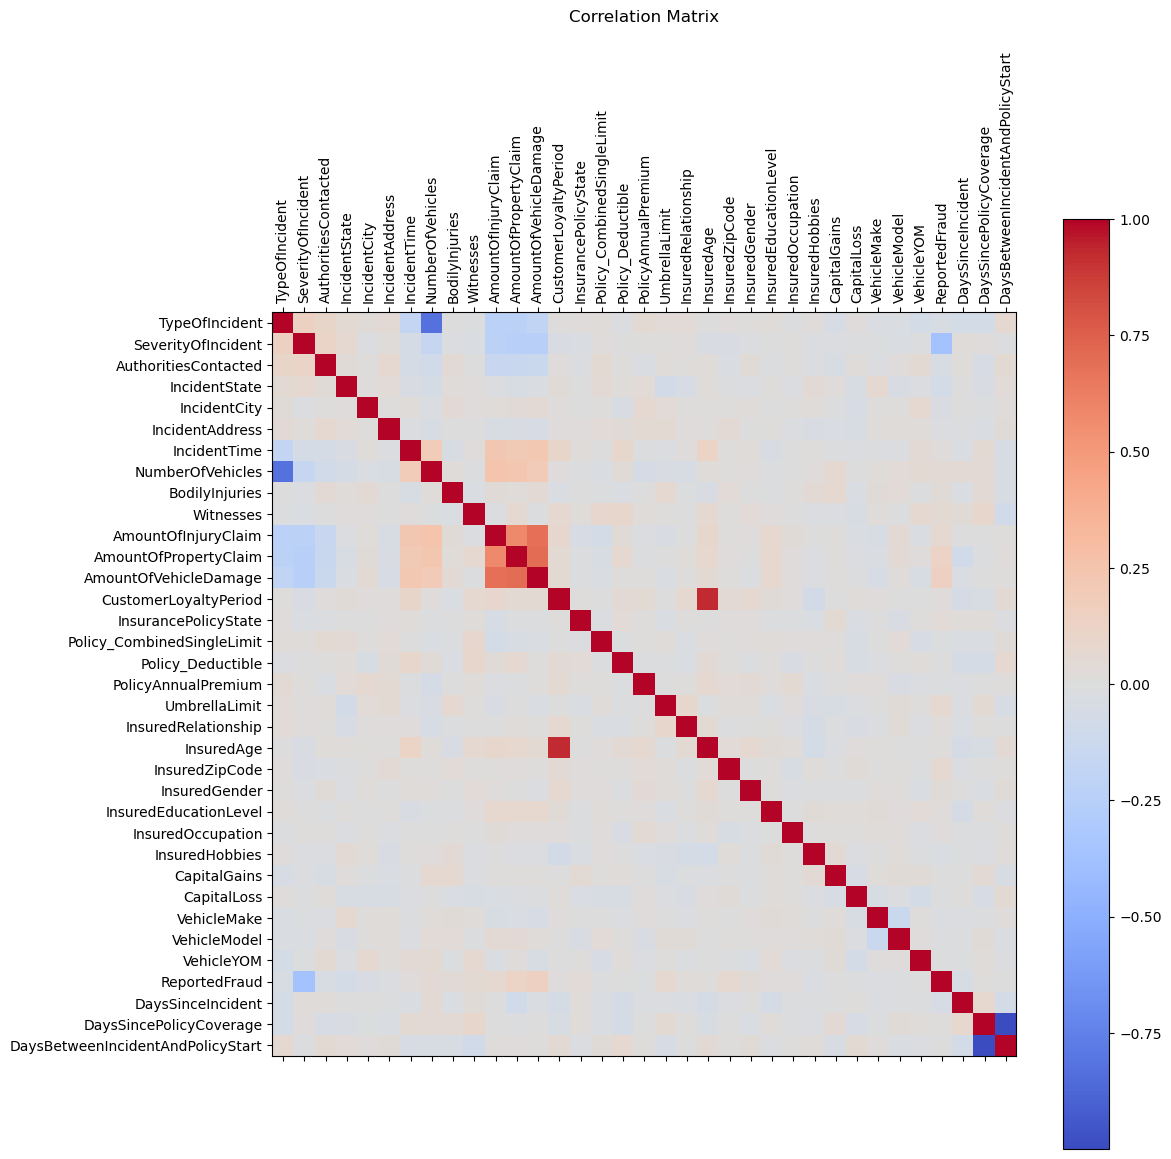

In [54]:
# Calculate the correlation matrix using Spearman Rank Correlation Coefficient
correlation_matrix = df.corr(method='spearman')

#Plot the correlation matrix
plt.figure(figsize=(12, 12))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
h = plt.title('Correlation Matrix', pad=20)


Features with a high correlation with the target variable based on a threshold exclusion.

In [55]:
# Select the features with high correlation with the target variable
correlation_threshold = 0.1
high_correlation_features = correlation_matrix[abs(correlation_matrix['ReportedFraud']) > correlation_threshold]['ReportedFraud']

# Display the features with high correlation
high_correlation_features

SeverityOfIncident      -0.359362
AmountOfPropertyClaim    0.124515
AmountOfVehicleDamage    0.147873
ReportedFraud            1.000000
Name: ReportedFraud, dtype: float64

Generally, there are not enough features with a high statistical correlation with the target variable. Therefore, another technique will be used to identify the most important features for inclusion in any model developed:

#### Feature Selection using Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a technique that recursively removes the least important features with a provided estimator model such as Logistic Regression or Random Forest, until a desired number of features is obtained. Initially, Logistic Regression with 10 features is attempted for selecting a subset of features.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Initialise the logistic regression estimator
estimator = LogisticRegression()

# Initialise RFE with the estimator
rfe = RFE(estimator, n_features_to_select=10)  # Adjust the number of features to select

# Fit the RFE using the oversampled dataset
rfe.fit(X_train_oversampled, y_train_oversampled)

# Get the selected features
selected_features = X_train_oversampled.columns[rfe.support_]

print("Selected features: \n" + ', '.join(selected_features.tolist()))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected features: 
SeverityOfIncident, IncidentState, IncidentCity, AmountOfInjuryClaim, AmountOfVehicleDamage, PolicyAnnualPremium, UmbrellaLimit, InsuredHobbies, CapitalLoss, DaysSinceIncident


The same is performed using the cross-validated RFE technique to further verify the feature selection.

In [66]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Create a basic rf_clf model
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 2

# Models for evaluation
lr_model = LogisticRegression(random_state=39)
rf_model = RandomForestClassifier(random_state=39, n_jobs=-1)

cv = StratifiedKFold(5)

rfecv_lr = RFECV(estimator=lr_model, step=1, cv=cv, scoring="f1",
              min_features_to_select=min_features_to_select, n_jobs=4)

#rfecv_rf = RFECV(estimator=rf_model, step=1, cv=cv, scoring="f1",
#              min_features_to_select=min_features_to_select, n_jobs=4)

rfecv_lr.fit(X_train_oversampled, y_train_oversampled)
#rfecv_rf.fit(X_train_oversampled, y_train_oversampled)

selected_features_lr = X_train_oversampled.columns[rfecv_lr.support_]
print(f"Optimal number of features (Logistic Regression): {rfecv_lr.n_features_}")

#selected_features_rf = X_train_oversampled.columns[rfecv_rf.support_]
#print(f"Optimal number of features (Random Forest): {rfecv_rf.n_features_}")

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimal number of features (Logistic Regression): 24


**RFECV with Random Forest takes a long time and was unable to reduce the number of features. This has been
commented out above, but in practice can be used with different scikit learn models.**

The reduced feature set is later compared on both models, using K-Fold cross-validation was used evaluate the model's performance later with different numbers of selected features. Genrally, it appears the majority of features in the dataset are selected for constructing the model, therefore a feature reduction is not considered necessary. 

In [52]:
print('Selected Features for Model Reduction (Logistic Regression): \n' + ', '.join(selected_features_lr.tolist()))

Selected Features for Model Reduction (Logistic Regression): 
SeverityOfIncident, IncidentState, IncidentCity, IncidentTime, NumberOfVehicles, PropertyDamage, Witnesses, AmountOfInjuryClaim, AmountOfPropertyClaim, AmountOfVehicleDamage, CustomerLoyaltyPeriod, InsurancePolicyState, PolicyAnnualPremium, UmbrellaLimit, InsuredRelationship, InsuredAge, InsuredZipCode, InsuredGender, InsuredHobbies, CapitalLoss, VehicleMake, VehicleModel, VehicleYOM, DaysSinceIncident


The features are ploted on a histogram against their target variable that were selected using *RFECV*.

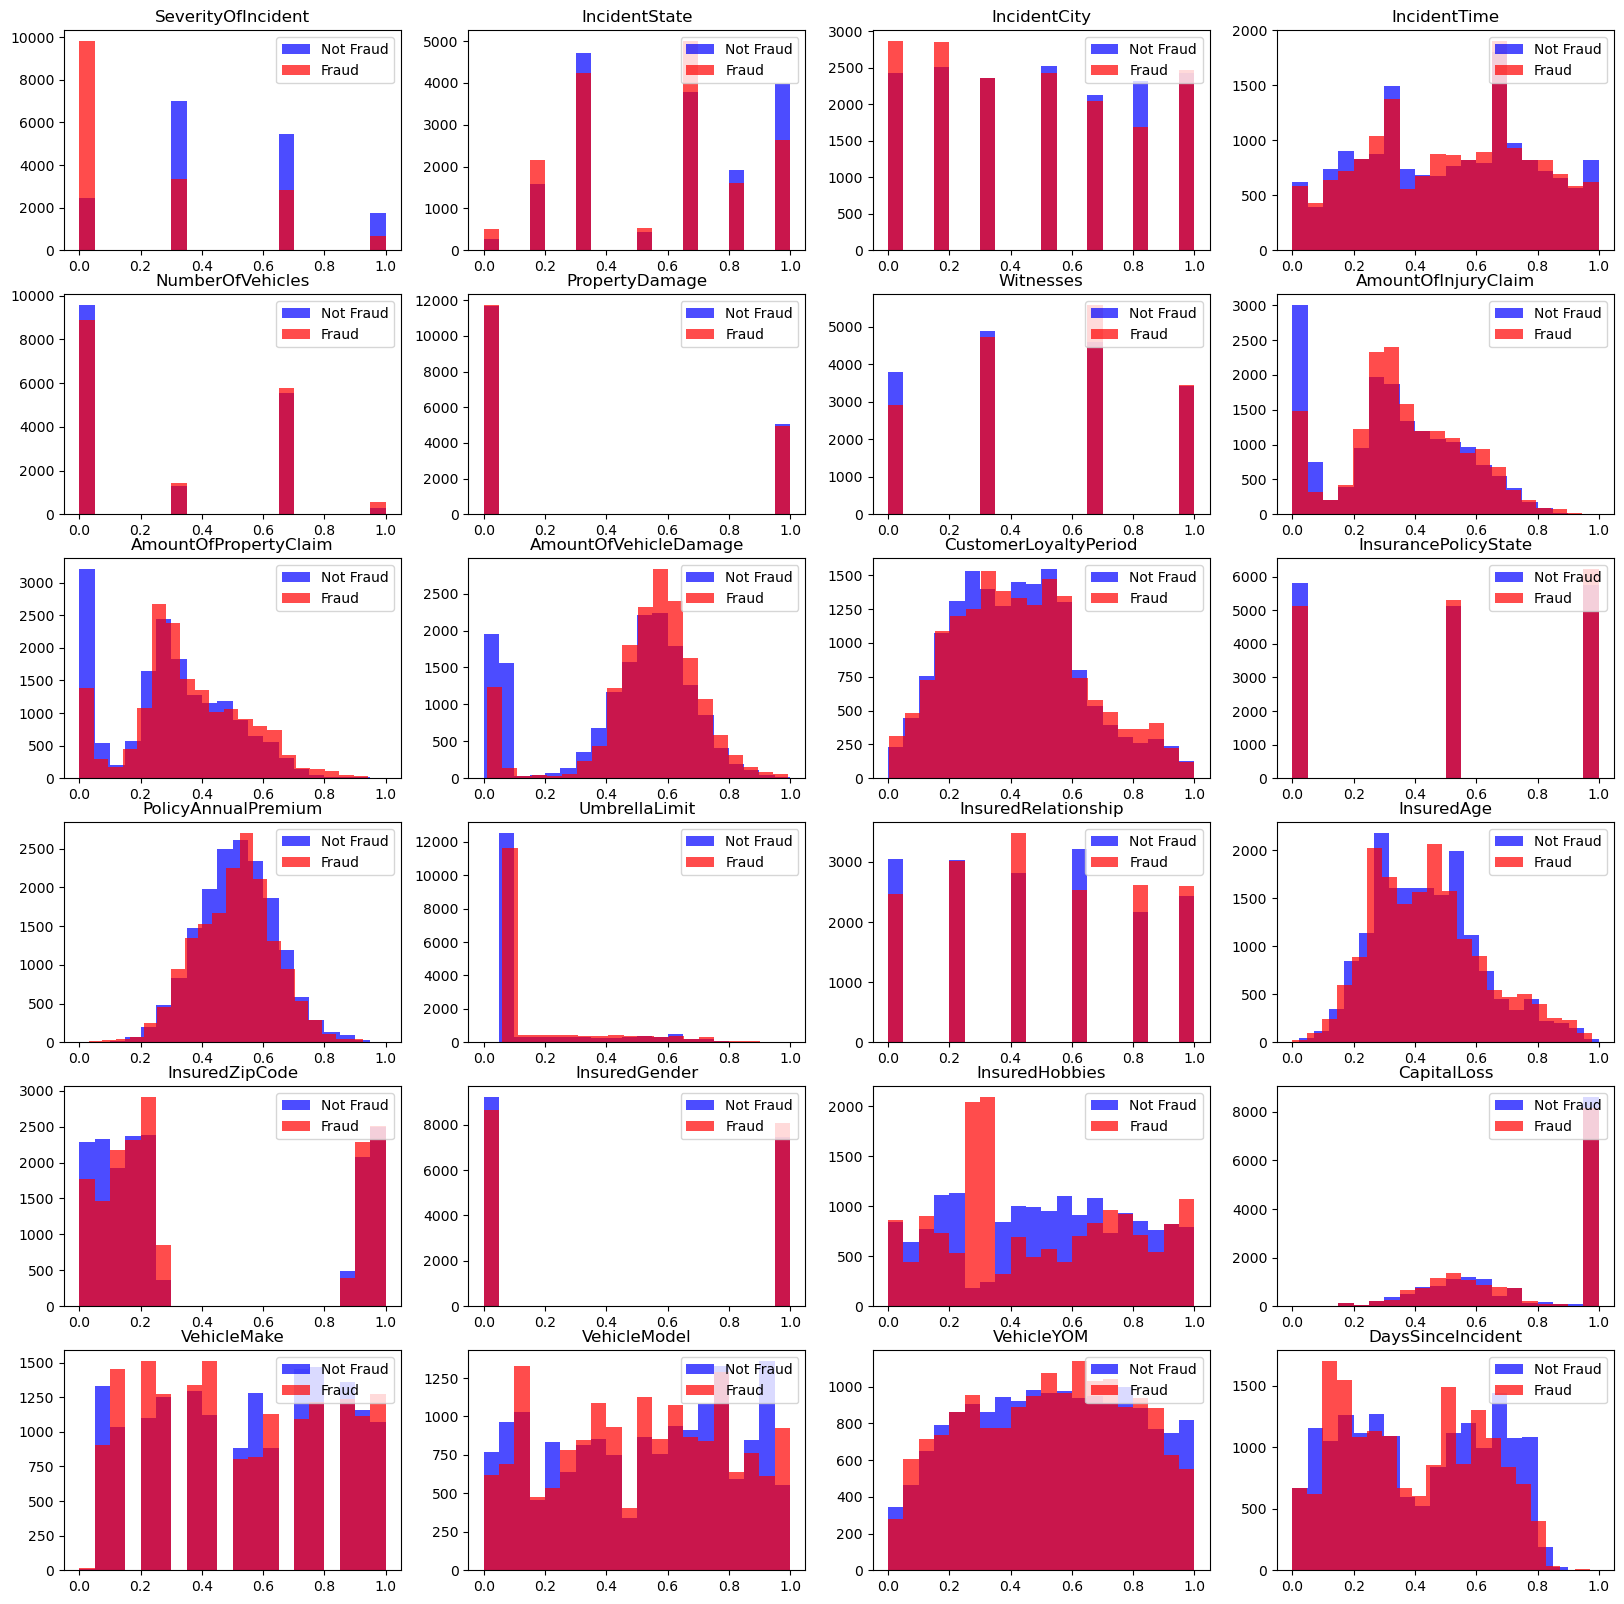

In [53]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(selected_features_lr):
    plt.subplot(6, 4, i + 1)
    plt.hist(train_data_oversampled[train_data_oversampled['ReportedFraud'] == 0][feature], bins=20, alpha=0.7, color='blue', label='Not Fraud')
    plt.hist(train_data_oversampled[train_data_oversampled['ReportedFraud'] == 1][feature], bins=20, alpha=0.7, color='red', label='Fraud')
    plt.title(feature)
    plt.legend(loc='upper right')


From the histogram above, an observation that there are noticeable categories for fraud under the '*InsuredHobbies*' category. Further inspection of the labels with high fraud are examined, to reveal any trends. This uses the``label_encoder.inverse_transform`` to obtain the original label of each category identified with high counts of fraud.

In [54]:
insured_hobbies_fraud_counts = df.groupby('InsuredHobbies')['ReportedFraud'].sum()
label_encoder = label_encoders['InsuredHobbies']
insured_hobbies_fraud_counts.index = label_encoder.inverse_transform(insured_hobbies_fraud_counts.index).reshape(-1,1)
insured_hobbies_fraud_counts

(base-jumping,)      396
(basketball,)        186
(board-games,)       405
(bungie-jumping,)    340
(camping,)           250
(chess,)             960
(cross-fit,)         935
(dancing,)           140
(exercise,)          335
(golf,)              223
(hiking,)            294
(kayaking,)          222
(movies,)            337
(paintball,)         384
(polo,)              431
(reading,)           421
(skydiving,)         347
(sleeping,)          255
(video-games,)       369
(yachting,)          489
Name: ReportedFraud, dtype: int32

The dataset with reduced features (extracted using the Logistic Regression estimator) are saved for use in the model development later.

In [70]:
# select the important features from oversampled dataset
X_train_oversampled_feat = train_data_oversampled[selected_features_lr].copy()
y_train_oversampled_feat = y_train_oversampled.copy()
X_test_feat = test_data[selected_features_lr]

## MODEL BUILDING

In this section of the case study, two machine learning model were developed to predict fraudulent claims:

1) **Logistic Regression**
2) **Random Forest Classifier**

Both models were trained and evaluated primarily using cross-validation techniques across different subsets of preprocessed data. 

### Model Training with Cross-Validation

In this step, we use cross-validation to train and evaluate the models. Cross-validation involves splitting the training data into multiple folds and training the model on each fold while evaluating it on the remaining data. This helps in assessing the model's performance more robustly and ensures that the model generalizes well to unseen data. The key metrics (F1-score, precision, recall, accuracy, and balanced accuracy) were calculated for each fold and averaged to provide a comprehensive evaluation of the model's performance. For this casestudy, the focus will be on using the *F1* metric.

A model pipeline is created to efficinetly train and evaluate the performance of different models during the model development.


### Creation of the Model Pipeline

The function pipelines are used for independently training the two models selected, with the ability to select the training dataset. Two function were created. The first function performs cross-validation and training, and the second nested cross-validation, in order to find the optimal hyperparameters for each model and accurately report the model's performance in order to prevent overfitting.

Across both pipelines, **stratified sampling when using K-Fold cross-validation** was used to maintain class balance, whilst shuffling aims to randomise the order of data presented to the model. The overall cross-validation scores are obtained for various binary classifier metrics for each mode using ``cross_val_score`` and returned for evaluation later.

In [64]:
# Create the model pipeline
def cv_kfold_pipeline(model, x, y):

    from sklearn.model_selection import StratifiedKFold, cross_val_score

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=39)

    score_types = ['f1', 'precision', 'accuracy', 'recall', 'balanced_accuracy']
    cv_scores = {}
    for score_type in score_types:
        # Obtain the mean score for all subsets
        cv_scores[score_type] = cross_val_score(model, x, y, cv=cv, scoring=score_type).mean()

    return cv_scores

In the ``nested_fold_pipeline``, nested cross-validation technique was used to perform hyperparameter tuning, using a grid search via ``GridSearchCV``, whilst assessing their overall performance using an outer cross-validation across a number of trials. During each trial the best model is selected by comparing the ``score_type``, generally '*F1*' for all models. By assessing the hyperparamter space across different samples, it reduces the likelihood of modelling overfitting and improve the model classification performance. Finally, once complete, the scoring metrics and best performing model are returned.

In [62]:
def nested_fold_pipeline(model, x, y, params, num_trials = 10, score_type='accuracy'):

    from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

    # Arrays to store scores
    non_nested_scores = np.zeros(num_trials)
    nested_scores = np.zeros(num_trials)

    best_score = 0
    best_model = None

    # Loop for each trial
    for i in range(num_trials):
        print('Trial {:d}/{:d} \r'.format(i+1, num_trials))
        inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
        outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)

        try:
            # Non_nested parameter search and scoring
            clf = GridSearchCV(estimator=model, param_grid=params, cv=inner_cv, n_jobs=-1)
            clf.fit(x, y)
        except:
            continue

        non_nested_scores[i] = clf.best_score_

        nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=score_type)
        nested_scores[i] = nested_score.mean()

        # Store the best model based on the nested_folding
        if nested_scores[i] > best_score:
            best_score = nested_scores[i]
            best_model = clf.best_estimator_

    return best_model, non_nested_scores, nested_scores, clf

### Model Evaluation and Metrics Functions

The following section is used to evaluate and plot the metrics of each model. It calculates the predictions scores and various metrics, inclding ROC and PRC curves, in addition to displaying their classification reports, visualisation on bar charts and confusion matrices.

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def calculate_metrics(y_test, y_test_pred):
    from sklearn.metrics import  precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score

    # Calculate precision, recall, and F1-score for the best model
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)

    metrics = {
        'precision': precision_test,
        'recall': recall_test,
        'f1': f1_test,
        'accuracy': accuracy_test,
        'balanced_accuracy': balanced_accuracy_test
    }

    return metrics

def print_classification_report(y_test, y_test_pred, label = ''):
    from sklearn.metrics import classification_report
        # Print classification report
    print("Model Classification Report: ({}):".format(label))
    print(classification_report(y_test, y_test_pred, target_names=['Not Fraud', 'Fraud'], output_dict=False))

def plot_confusion_matrix(y_test, y_test_pred, normalize='all', title='', handle=None):
    # Creates the confusion matrix plot given y and y_test data
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    conf_matrix_norm = confusion_matrix(y_test, y_test_pred, normalize=normalize)
    conf_matrix_norm *= 100

    if handle:
        fig,ax = handle
    else:
        fig, ax = plt.subplots(figsize=(6, 6))

    cax = ax.matshow(conf_matrix, cmap='coolwarm')
    fig.colorbar(cax, fraction=0.046, pad=0.04)  # Adjust the color bar size here

    # Add text in the four quadrants
    for (i, j), val in np.ndenumerate(conf_matrix):
        ax.text(j, i, f'{val:3.0f}', ha='center', va='center', color='black', fontsize=12)
        ax.text(j, i+0.1, f'({conf_matrix_norm[i,j]:.1f}%)', ha='center', va='center', color='black', fontsize=10)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix ({title})')

    return fig

def plot_model_metrics(model_scores, metrics, model_labels, title = ''):

    # Plot the evaluation metrics
    fig = plt.figure(figsize=(10, 6))
    bar_width = 0.15
    index = range(len(metrics))

    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Scores', fontsize=12)
    plt.title(f"Evaluation Metrics: {title}")

    # Plot the scores of each models together
    for j, scores in enumerate(model_scores):
        model_score = [scores[metric] for metric in metrics]
        bar = plt.bar([i + j*bar_width for i in index], model_score, bar_width, label=model_labels[j])
        # plot the bar labels rotated 90 in the centre of the bar in white
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2.0, height/2, f'{height:.2f}', ha='center', va='bottom', color='white', fontsize=8, rotation='vertical')


    plt.legend(loc=[0.4,-0.3])
    plt.xticks([i + bar_width / 3 for i in index], [txt.upper() for txt in metrics])
    return fig

def plot_feature_importance(model, feature_names, top_n=None, label='', handle=None):
    """
    Plots the feature importance for a given model.
    """

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    # Check if the model has coef_ attribute (for linear models)
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])

    if handle:
        fig,ax = handle
    else:
        fig, ax = plt.subplots(figsize=(6, 6))

    # Get the indices of the top_n features
    if top_n:
        indices = np.argsort(importances)[-top_n:]
    else:
         indices = np.argsort(importances)

    ax.barh(range(len(indices)), importances[indices], align='center')
    ax.set_yticks(range(len(indices)), [feature_names[i] for i in indices])
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Feature')
    ax.set_title('Model Feature Importances {:s}'.format(label))


def plot_roc_curve(model, x_test, y_test, name='', handle = None):
    # Plot ROC curve
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    if handle:
        fig,ax = handle
    else:
        fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # set the limits and labels for the axis ax
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve - {}'.format(name))
    ax.legend(loc='lower right')
    return fig


def plot_precision_recall_curve(model, x_test, y_test, name = '', handle=None):
    # Plot Precision-Recall curve
    from sklearn.metrics import precision_recall_curve, auc
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(x_test)[:, 1])
    pr_auc = auc(recall, precision)

    if handle:
        fig, ax = handle
    else:
        fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('Precision-Recall Curve - {}'.format(name))
    ax.legend(loc='lower left')
    return fig


### Model 1: Logistic Regression Development

The logistic regression (LR) model is set up within a cross-validation pipeline for training and evaluating the model performance. Different preprocessed datasets are used as input into the pipeline to validate and inspect assumption used for preprocessing the data, including:

* **Effect of balancing on the target variable (*ReportedFraud*) via oversampling of minority class**
* **Effect of feature reduction on the balanced dataset**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a basic log_reg model
log_reg_model = LogisticRegression(random_state=39, max_iter=200, n_jobs = -1) #solver='sag',

# Perform the k_fold stratified cross-validation on the unbalanced data
basic_log_reg_unbalanced = cv_kfold_pipeline(log_reg_model,X_train, y_train)

# Perform the k_fold stratified cross-validation on the oversampled model
basic_log_reg_balanced = cv_kfold_pipeline(log_reg_model,X_train_oversampled, y_train_oversampled)

#Perform the k_fold stratified cross-validation on the oversampled model with selected features
basic_log_reg_balanced_feat = cv_kfold_pipeline(log_reg_model,X_train_oversampled_feat, y_train_oversampled_feat)

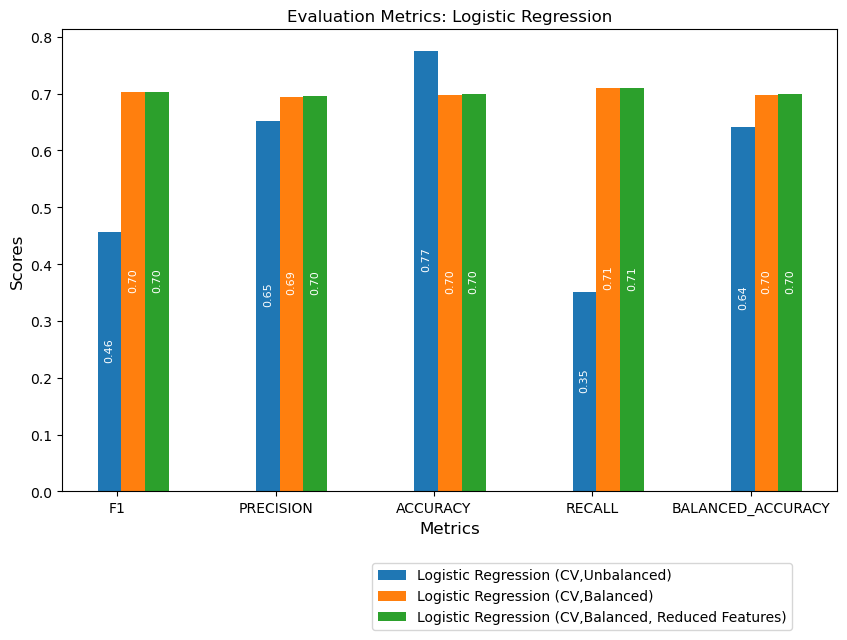

In [79]:
#Plot the evaluation metrics for cross-validation
fig = plot_model_metrics([basic_log_reg_unbalanced, basic_log_reg_balanced, basic_log_reg_balanced_feat], basic_log_reg_balanced.keys(),
                         ['Logistic Regression (CV,Unbalanced)', 'Logistic Regression (CV,Balanced)', 'Logistic Regression (CV,Balanced, Reduced Features)'],
                        title='Logistic Regression')

On the above bar chart the evaluation metrics for the LR model on the training set with cross validation are shown. The model was trained separately on the unbalanced dataset, the oversampled dataset, and the oversampled dataset with selected features. As observed, the model performs poorly in detecting fraudulent cases due to the class imbalance, resulting in low recall (0.35) and F1 score (0.45). Using a balanced dataset via oversampling has improved the model's ability to detect fraud, indicated by a higher recall (0.71) and F1 score (0.70), but reduces the overall accuracy (0.69).

Furthermore, using the balanced dataset with a reduced number of features (24) did not impact the model's classification performance. This is advantageous for improving the throughput training models with significantly larger datasets, but also to inform the Insurance Company for gathering data features from customers related to these reduced feature set in order to maximise the predictive performance of the model.

The LR model was then trained on the full training dataset and additionally tested on the test dataset for evaluation.

In [80]:
# Train the Logistic Regression model across the full dataset
log_reg_model.fit(X_train_oversampled, y_train_oversampled)
log_reg_y_train_pred = log_reg_model.predict(X_train_oversampled)
log_reg_train_metrics = calculate_metrics(y_train_oversampled, log_reg_y_train_pred)

# Test data set prediction
log_reg_y_test_pred = log_reg_model.predict(X_test)
log_reg_test_metrics = calculate_metrics(y_test, log_reg_y_test_pred)

print_classification_report(y_test, log_reg_model.predict(X_test), 'Logistic Regression')

Model Classification Report: (Logistic Regression):
              precision    recall  f1-score   support

   Not Fraud       0.87      0.69      0.77      4174
       Fraud       0.46      0.71      0.56      1544

    accuracy                           0.70      5718
   macro avg       0.66      0.70      0.66      5718
weighted avg       0.76      0.70      0.71      5718



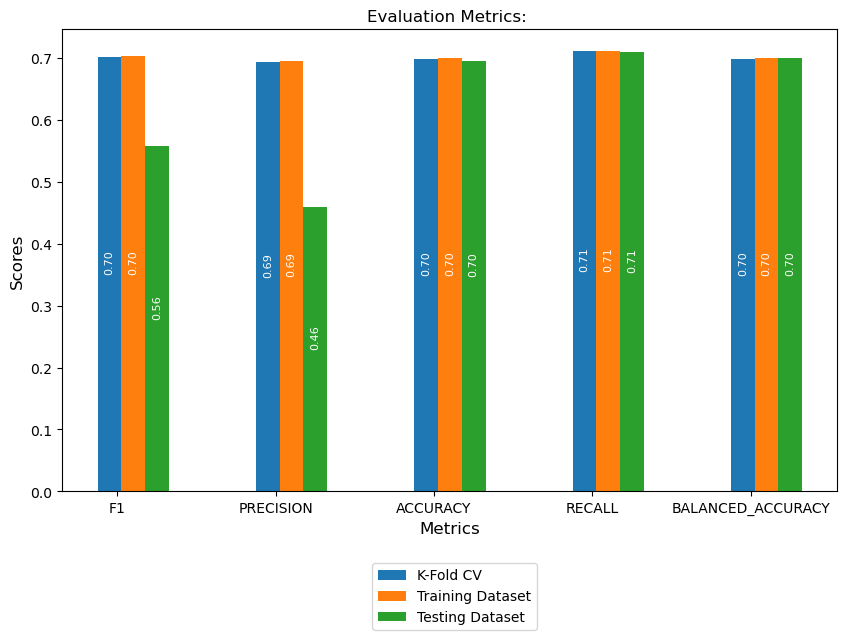

In [82]:
# plot the data
fig = plot_model_metrics([basic_log_reg_balanced, log_reg_train_metrics, log_reg_test_metrics], basic_log_reg_balanced.keys(), 
                         ['K-Fold CV', 'Training Dataset', 'Testing Dataset'])

Following training using the entire training dataset, the model keeps the same performance metrics for the model developed using K-Fold cross-validation. However, independently using the testing dataset, the precision for detecting fraud cases is considerably reduced, whilst other metrics remain similar to these learnt exclusively on the training set. The confusion matrices evaluate predictions across training and testing datasets:

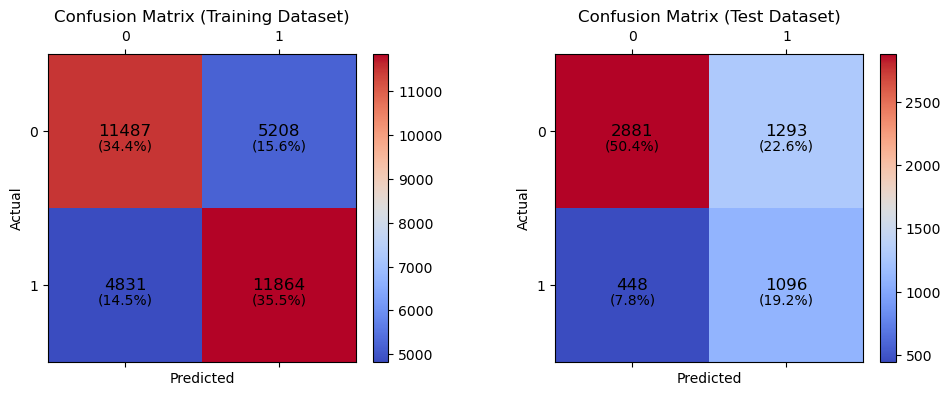

In [61]:
# Plot the confusion matrix for the LR model on the balanced training dataset and testing dataset
fig, axs = plt.subplots(1,2, figsize=(12, 4))
h = plot_confusion_matrix(y_train_oversampled, log_reg_y_train_pred, title='Training Dataset', handle=(fig, axs[0]))
h = plot_confusion_matrix(y_test, log_reg_y_test_pred, title='Test Dataset', handle=(fig, axs[1]))

Across both training and testing data predictions, there are many false positives (FP), where genuine claims are mistakenly classified as fraudulent. These can lead to scrutinising customers and costly investigations that may result to loss of customers to the company. Overall, the LR model's current performance in detecting fraud (high recall) is conservative (~0.7), and especially in the context for the insurance company, undetected fraudulent cases is high leading to financial losses.

#### Logistic Regression Hyperparamter Tuning: Nested Cross-Validation

Finally, for hyperparameter optimisation for the logistic regression model, nested k-fold cross-validation using ``nested_fold_pipeline()`` was used to evaluate the model's performance more carefully whilst simultaenously identify the best hyperparameters.


In [83]:
log_reg_params = {'C':[0.01,0.1,1,10, 100], 'penalty': ['l2']} # 'penalty': ['l1', 'elasticnet']

log_reg_model = LogisticRegression(random_state=39, max_iter=200, n_jobs = -1) #solver='sag',

NUM_TRIALS = 10

best_log_reg_model, non_nested_scores, nested_scores, clf = nested_fold_pipeline(log_reg_model, X_train_oversampled, y_train_oversampled, log_reg_params, num_trials=NUM_TRIALS, score_type='f1')

print('Maximum non-nested (F1) score: {:.2f}'.format(np.max(non_nested_scores)))
print('Model hyperparameters identified: ', clf.best_params_)

Trial 1/10 
Trial 2/10 
Trial 3/10 
Trial 4/10 
Trial 5/10 
Trial 6/10 
Trial 7/10 
Trial 8/10 
Trial 9/10 
Trial 10/10 
Maximum non-nested (F1) score: 0.70
Model hyperparameters identified:  {'C': 1, 'penalty': 'l2'}


Text(0.5, 1.0, 'Non-Nested and Nested Cross Validation')

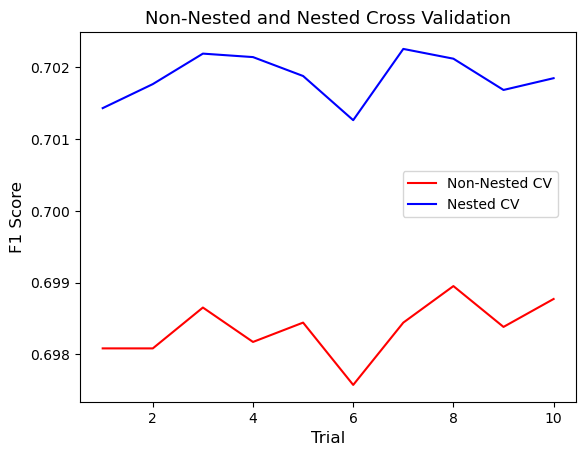

In [92]:
plt.figure()
non_nested_scores_line, = plt.plot(np.arange(1,NUM_TRIALS+1),non_nested_scores, color='r')
nested_line, = plt.plot(np.arange(1,NUM_TRIALS+1), nested_scores, color='b')
plt.xlabel("Trial", fontsize="12")
plt.ylabel("F1 Score", fontsize="12")
plt.legend([non_nested_scores_line, nested_line], ["Non-Nested CV", "Nested CV"], loc=[0.65,0.5])
plt.title("Non-Nested and Nested Cross Validation",fontsize="13")

The maximum non-nested (F1) score is MISSING. **The model hyperparameters identified were C=1.0**. The LR model was trained with these hyperparameters on the full dataset its performance is evaluated in the next section.

In [95]:
#Train the logistic regression model with the best hyperparameters on the full dataset
h = best_log_reg_model.fit(X_train_oversampled, y_train_oversampled)

### Model 2: Random Forest Classifier Development

The second model selected is the Random Forest (RF) classifier. RF is an ensemble learning method that builds and combines multiple decision trees offering an accurate and stable prediction. RF was chosen as it is less prone to overfitting and can handle large datasets with higher dimensionality.

Like the LR model, the effect of pre-processed dataset inputs are explored on the modelling performance.

In [97]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create a basic rf_clf model
rf_model = RandomForestClassifier(random_state=32, n_jobs=-1)

# Perform the k_fold stratified cross-validation on the unbalanced data
cv_rf_unbalanced = cv_kfold_pipeline(rf_model, X_train, y_train)

# Perform the k_fold stratified cross-validation on the oversampled model
cv_rf_balanced = cv_kfold_pipeline(rf_model, X_train_oversampled, y_train_oversampled)

# Perform the k_fold stratified cross-validation on the oversampled model
cv_rf_balanced_feat = cv_kfold_pipeline(rf_model, X_train_oversampled_feat, y_train_oversampled_feat)

The RF models on the training dataset using different configurations: unbalanced data, balanced and balanced with feature reduction based on those identified using LR model estimator using the *RFECV* technique.

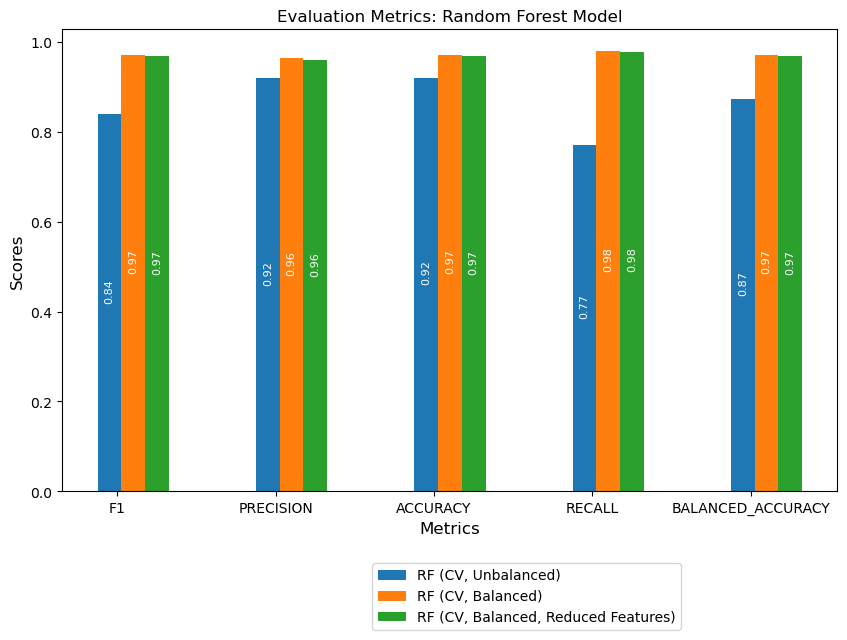

In [98]:
# Plot the evaluation metrics for the basic Random Forest Classifier model
fig = plot_model_metrics([cv_rf_unbalanced, cv_rf_balanced, cv_rf_balanced_feat], cv_rf_balanced.keys(),
                         ['RF (CV, Unbalanced)', 'RF (CV, Balanced)', 'RF (CV, Balanced, Reduced Features)'],
                         title='Random Forest Model')

Like the LR model, for all techniques, using a balancing the dataset for the target variable improves the performance across all metric using cross-validation alone. In particular, recall is lower with a lower true positive rate - i.e. inability to detect fraudulent cases, because less fraudulent cases are exist within the dataset due to class imbalance. 

The model was then trained and evaluated on the entire training dataset.

In [99]:
# Train the Random Forest model across the full dataset
rf_model.fit(X_train_oversampled, y_train_oversampled)
rf_y_train_pred = rf_model.predict(X_train_oversampled)
rf_train_metrics = calculate_metrics(y_train_oversampled, rf_y_train_pred)

#Test data set prediction
rf_y_test_pred = rf_model.predict(X_test)
rf_test_metrics = calculate_metrics(y_test, rf_y_test_pred)

print_classification_report(y_train_oversampled, rf_y_train_pred, 'Random Forest Classifier')
print_classification_report(y_test, rf_y_test_pred, 'Random Forest Classifier')

Model Classification Report: (Random Forest Classifier):
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     16695
       Fraud       1.00      1.00      1.00     16695

    accuracy                           1.00     33390
   macro avg       1.00      1.00      1.00     33390
weighted avg       1.00      1.00      1.00     33390

Model Classification Report: (Random Forest Classifier):
              precision    recall  f1-score   support

   Not Fraud       0.93      0.97      0.95      4174
       Fraud       0.91      0.79      0.85      1544

    accuracy                           0.92      5718
   macro avg       0.92      0.88      0.90      5718
weighted avg       0.92      0.92      0.92      5718



The performance metrics of model across the K-Fold Cross-Validation (CV), training dataset, and testing dataset is presented below.

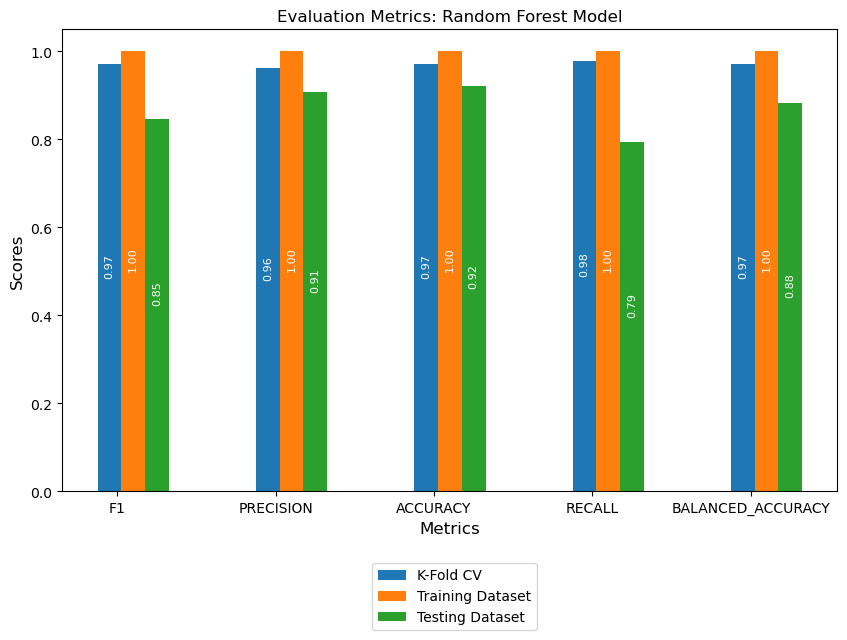

In [100]:
fig = plot_model_metrics([cv_rf_balanced, rf_train_metrics, rf_test_metrics], cv_rf_balanced.keys(),
                         ['K-Fold CV', 'Training Dataset', 'Testing Dataset'],
                         title='Random Forest Model')

Perfect metrics (1.0) across the entire training dataset indicate that the models have learnt the patterns in the training data extremely well, but there is potential overfitting as all metrics are less when using the testing dataset, in particular *recall*. This is more clearly seen in the confusion matrices for the RF model's prediction for training and testing datasets:

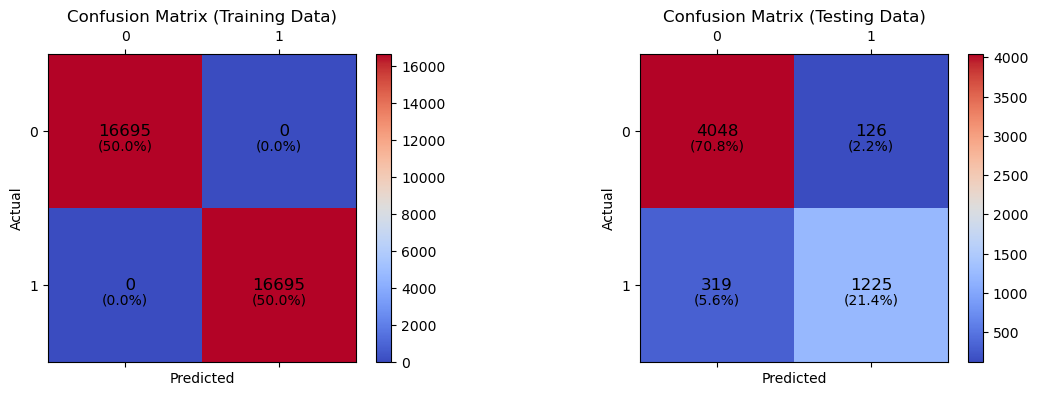

In [101]:
# Plot the confusion matrix for the Random Forest Classifier model on the cross validation training set
fig, axs = plt.subplots(1,2, figsize=(14,4))
h = plot_confusion_matrix(y_train_oversampled, rf_y_train_pred, title='Training Data', handle=(fig,axs[0]))
h = plot_confusion_matrix(y_test, rf_y_test_pred, title='Testing Data', handle=(fig,axs[1]))

The perfect score in the training dataset, suggests the model does not generalise to seeing new data. As observed in the confusion matrix for test dataset, while the number of FP is relatively low (2.4%), it still represents a risk of losing genuine customers and FN (5.6%) indicate that fraudulent cases are incorrectly identified.

Most significantly, *recall* is 1.0 on the training set, 0.98 for K-Fold CV, and reduces to *0.79* on the testing dataset.
The recall drop on the test set is notable and means the model is missing more fraudulent cases on unseen data. This suggests that the model may struggle with recall when exposed to new patterns of fraud, which is a critical concern for fraud detection. Likewise, *balanced* accuracy is high for Training Dataset (1.0) and K-Fold CV (0.97), but drops to 0.88 for predictions on the the testing dataset. The slight reduction achieving balanced performance on both classes (fraud and non-fraud) for the test data, though it is still relatively strong.

RF currently performs satisfactorily across the entire training dataset, but its performance on the testing dataset shows a drop in classification performance, especially in *recall* and F1 score. This could potentially arise from overfitting using the RF's default hyperparamters provided in ``scikit-learn`` or due to overall replication of data during oversampling to resolve the severity of the class imbalance. Therefore, hyperparameter tuning using the nested cross-validation technique was used to address overfitting, in order to improve the overall robustness of classifier prediction.


#### Random Forest Hyperparamter Tuning: Nested Cross-Validation
Hyperparameter tuning was focused in particular on the *maximum tree depth*, *min sample split* and *min samples leaf* amongst other parameters because this is associated with prediction accuracy and degradation due to overfitting, as the depth and the nodes on the decision tree increases. The number of estimators - trees in the forest, provide a further means of controlling overfitting.  *In practice, a narrow hyperparameter is explored due to its overall computational cost.*

In [130]:
# Define the hyperparameters for the Random Forest Classifier
rf_clf_params = {
    'n_estimators': [60, 90, 120], # default = 100
    'max_depth': [None, 30, 60], # default = None
    'min_samples_split': [2, 4, 6], # default = 2
    'min_samples_leaf': [1, 2, 4], # default = 1
}

NUM_TRIALS = 10
# Perform nested k-fold cross-validation for the Random Forest Classifier
best_rf_model, non_nested_scores, nested_scores, clf = nested_fold_pipeline(rf_model, X_train_oversampled, y_train_oversampled, rf_clf_params, num_trials=NUM_TRIALS, score_type='f1')

# Print the maximum non-nested F1 score and the best hyperparameters identified
print('Maximum non-nested (F1) score: {:.2f}'.format(np.max(non_nested_scores)))
print('Model hyperparameters identified: ', clf.best_params_)

Trial 1/10 
Trial 2/10 
Trial 3/10 
Trial 4/10 
Trial 5/10 
Trial 6/10 
Trial 7/10 
Trial 8/10 
Trial 9/10 
Trial 10/10 
Maximum non-nested (F1) score: 0.97
Model hyperparameters identified:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 90}


The nester scored verse trial are plotted below:

Text(0.5, 1.0, 'Non-Nested and Nested Cross Validation')

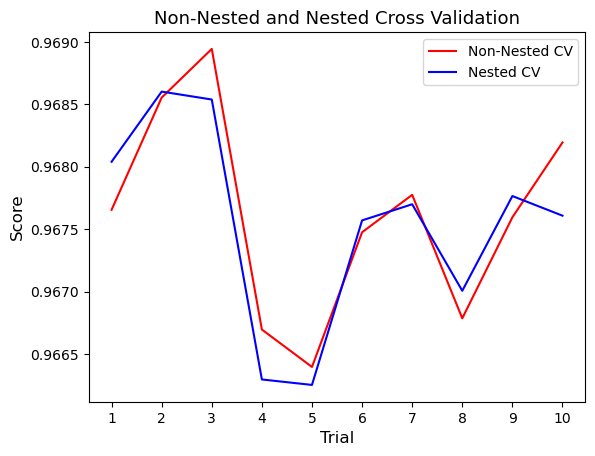

In [134]:
# Plot the non-nested and nested cross-validation scores
plt.figure()
non_nested_scores_line, = plt.plot(np.arange(1,NUM_TRIALS+1), non_nested_scores, color='r')
nested_line, = plt.plot(np.arange(1,NUM_TRIALS+1),nested_scores, color='b')
plt.xlabel("Trial", fontsize="12")
plt.xticks(np.arange(1,NUM_TRIALS+1, 1))
plt.ylabel("Score", fontsize="12")
plt.legend([non_nested_scores_line, nested_line], ["Non-Nested CV", "Nested CV"])
plt.title("Non-Nested and Nested Cross Validation",fontsize="13")

Using nested k-fold cross-validation, optimal hyperparameters for the RF were obtained as:

* num_estimators=60
* max_depth=None.

It can be seen that the nested score remains relatively close to the non-nested score.

Maximum non-nested (F1) score: 0.97
Model hyperparameters identified:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}


The RF model using these hyperparameters were trained on full training dataset and its performance evaluated in the next section.

In [102]:
# Create a basic rf_clf model
best_rf_model = RandomForestClassifier(random_state=32, n_jobs=-1, max_depth=30, n_estimators=120)
best_rf_model.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier(max_depth=30, n_estimators=120, n_jobs=-1,
                       random_state=32)

## 6. Comparison of Metrics Performance for Testing

This section evaluates and compares the performance on testing data for both LR and RF models that have had hyperparameter tuned using the nested cross-validation model pipeline. Overfitting and model prediction capability is explored using visualisation, and their implication on the cost to business is further analysed.

### Logitistic Regression Model
The final model predictions and metrics for the best LR model are calculated: 

In [103]:
#Test the Logistic Regression model on the test set
best_log_reg_y_train_pred = best_log_reg_model.predict(X_train_oversampled)
best_log_reg_y_test_pred = best_log_reg_model.predict(X_test)

#Calculate the evaluation metrics for the best model on the test set
best_log_reg_train_metrics = calculate_metrics(y_train_oversampled, best_log_reg_y_train_pred)
best_log_reg_test_metrics = calculate_metrics(y_test, best_log_reg_y_test_pred)

#Print the classification report for the best model on the test set
print_classification_report(y_test, best_log_reg_y_test_pred, 'Logistic Regression')

Model Classification Report: (Logistic Regression):
              precision    recall  f1-score   support

   Not Fraud       0.87      0.69      0.77      4174
       Fraud       0.46      0.71      0.56      1544

    accuracy                           0.70      5718
   macro avg       0.66      0.70      0.66      5718
weighted avg       0.76      0.70      0.71      5718



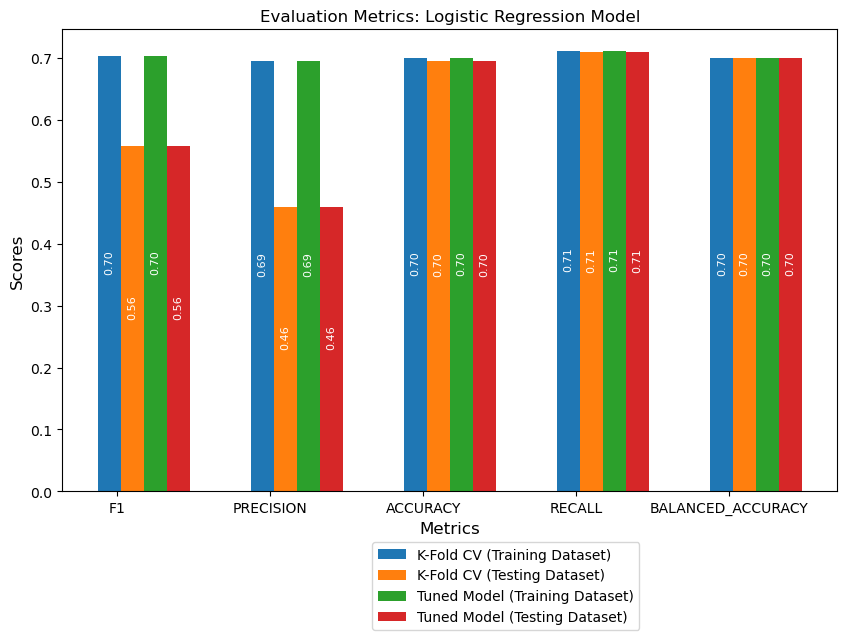

In [104]:
# Plot the evaluation metrics for the Random Forest Classifier model on the test set
fig = plot_model_metrics([log_reg_train_metrics, log_reg_test_metrics,
                          best_log_reg_train_metrics, best_log_reg_test_metrics], cv_rf_balanced.keys(),
                         ['K-Fold CV (Training Dataset)', 'K-Fold CV (Testing Dataset)',
                          'Tuned Model (Training Dataset)', 'Tuned Model (Testing Dataset)'],
                         title='Logistic Regression Model')

The LR model performance is insufficient across all metrics at classifying claims across both classes. The LR mode achieves balanced error target of 30%, which is far from the company's target. In particular, the *precision* (46%) reveals the severity for misclassifying valid claims (FPs).

### Random Forest Model
The best RF model is now evaluted and the metrics are calculated.

In [105]:
best_rf_y_train_pred = best_rf_model.predict(X_train_oversampled)
best_rf_train_metrics = calculate_metrics(y_train_oversampled, best_rf_y_train_pred)

# Test data set prediction
best_rf_y_test_pred = best_rf_model.predict(X_test)
best_rf_test_metrics = calculate_metrics(y_test, best_rf_y_test_pred)
print_classification_report(y_test, best_rf_y_test_pred, 'Random Forest Model')

Model Classification Report: (Random Forest Model):
              precision    recall  f1-score   support

   Not Fraud       0.93      0.97      0.95      4174
       Fraud       0.91      0.80      0.85      1544

    accuracy                           0.92      5718
   macro avg       0.92      0.88      0.90      5718
weighted avg       0.92      0.92      0.92      5718



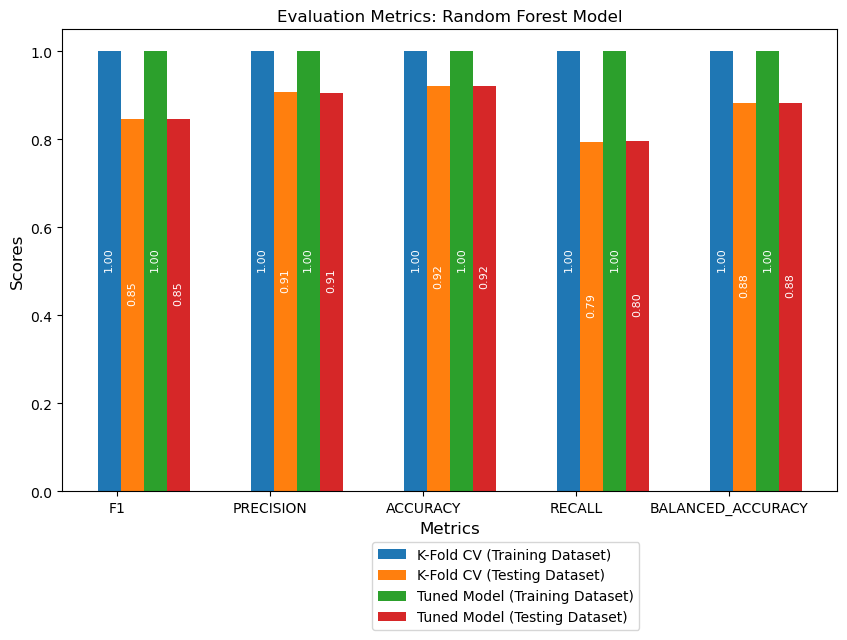

In [108]:
# Plot the evaluation metrics for the Random Forest Classifier model on the test set
fig = plot_model_metrics([rf_train_metrics, rf_test_metrics,
                          best_rf_train_metrics, best_rf_test_metrics], cv_rf_balanced.keys(),
                         ['K-Fold CV (Training Dataset)', 'K-Fold CV (Testing Dataset)',
                          'Tuned Model (Training Dataset)', 'Tuned Model (Testing Dataset)'],
                         title='Random Forest Model')

The RF model achieves a balanced error rate at 12%, which does not meet the company's requirement target (5%). When comparing the weighted averages scores for the RF model across categories: precision (0.93), recall (0.93), F1-Score (0.92)
this reflects the model's overall performance, but is heavily influenced by the larger proportion of non-fraudulent cases within the dataset.

Despite the use of hyperparameter tuning on the RF model, the overall classification performance is marginally better across most metrics. The model correctly classified 93% of all claims (both fraudulent and non-fraudulent), but is insufficient to evaluate the model in the inherent imbalanced datasets, where fraudulent claims are less likely (27% of original data). However, the '*recall*' score still remains relatively poor (0.80), and despite the tuned RF model's ability to predict non-fraudulent claims accurately, 20% of fraudulent cases still remain incorrectly classified.


This indicates the presence of overfitting, reducing the RF model's ability to distinguish fraudulent claims, which is likely caused by either insufficient quantity of data attributes to distinguish fraudulent claims. Additionally, the use of a simple oversampling (``sklearn.resample``) to address the class imbalance present in the original dataset, which randomly inserts existing data points into the distribution is suspected to not improve this.

### Comparison between LR and RF Models

For further comparison between both tuned LR and RF tuned models, the confusion matrices are plotted for predictions on the testing dataset.

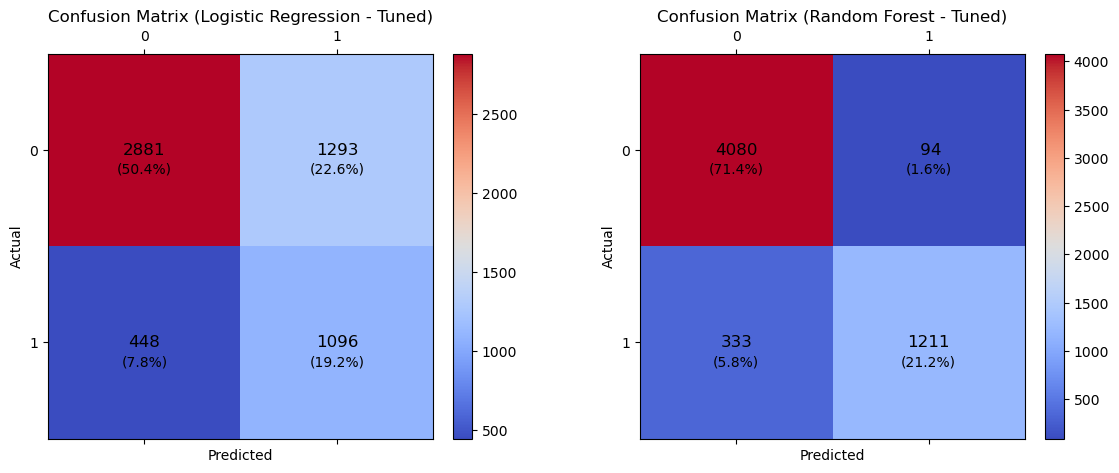

In [145]:
# Plot the confusion matrix for the Random Forest Classifier model on the test set
fig, axs = plt.subplots(1,2, figsize=(14, 5))
#Plot the confusion matrix for the best model on the test set
h = plot_confusion_matrix(y_test, best_log_reg_y_test_pred,
                          title='Logistic Regression - Tuned', handle=(fig,axs[0]))
h = plot_confusion_matrix(y_test, best_rf_y_test_pred,
                          title='Random Forest - Tuned', handle=(fig,axs[1]))

 Whilst the performance of the RF model is significantly better than LR model across all metrics, improvements are still required to the RF model in order to attain better recall performance i.e. reduce frequency of FNs that are needed to minimise the number of fraudulent claims classified is valid.

Evidently, the RF model outperforms the LR model across all metrics, and there are reduced number FPs (22.6% vs 1.6%) and FNs (7.8% vs 5.8%) that contribute a form of cost or loss of revenue for the business.  Most significantly is the inabiltiy of the LR model to accurately predict valid claims marked as fraudulent, leading to signficant disruption to the customer's claims and requiring company resources to investigate. Across both models, the  'recall' score is persistently low with a high number of FNs, that are unable to catch fraudulent cases.

### ROC Curves for Logistic Regression and Random Forest Models

The *receiver operating characteristic* (ROC) curve shows the trade-off between the true positive rate (*sensitivity*) and the false positive rate (*1-specificity*) under various threshold values. A larger area under curve (AUC) indicates a better performance to distinguish between the binary classes. The ROC curve for both the RF and LR models was plotted to identify its ability to distinguish between fraudulent and non-fraudulent claims.

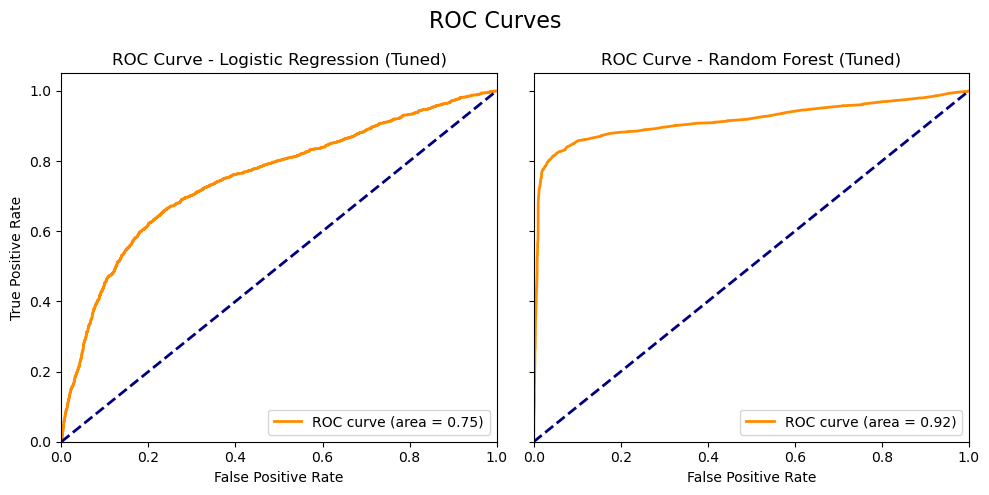

In [109]:
# Plot the ROC curve for the Logistic Regression model
fig, axs = plt.subplots(1,2, figsize=(10, 5), sharey=True)
fig.suptitle('ROC Curves', fontsize=16)
h = plot_roc_curve(best_log_reg_model, X_test, y_test, 'Logistic Regression (Tuned)', (fig, axs[0]))
h = plot_roc_curve(best_rf_model, X_test, y_test, 'Random Forest (Tuned)', (fig, axs[1]))
h.gca().set_ylabel('')
plt.tight_layout()

The LR model has moderate performance (*AUC = 0.75*) in distinguishing between fraudulent and non-fraudulent case, however, it may struggle with some cases, leading to a mix of FP (flagging honest claims as fraud) and FN (missing actual fraud) that will impact the profitability of the business. The RF model is better suited at accurately (*AUC = 0.92*)  distinguishing between valid and fraudulent claims, and is less sensitive to a chosen model threshold.

### Precision-Recall Curve
The *Precision-Recall Curve* (PRC) plots precision (*positive predictive value*) against recall (*sensitivity*) for different threshold values. The PRC's AUC provides a measure of the model's ability to correctly identify positive instances. A larger AUC indicates better performance in identifying fraudulent claims. The PRC was plotted for both LR and RF models:

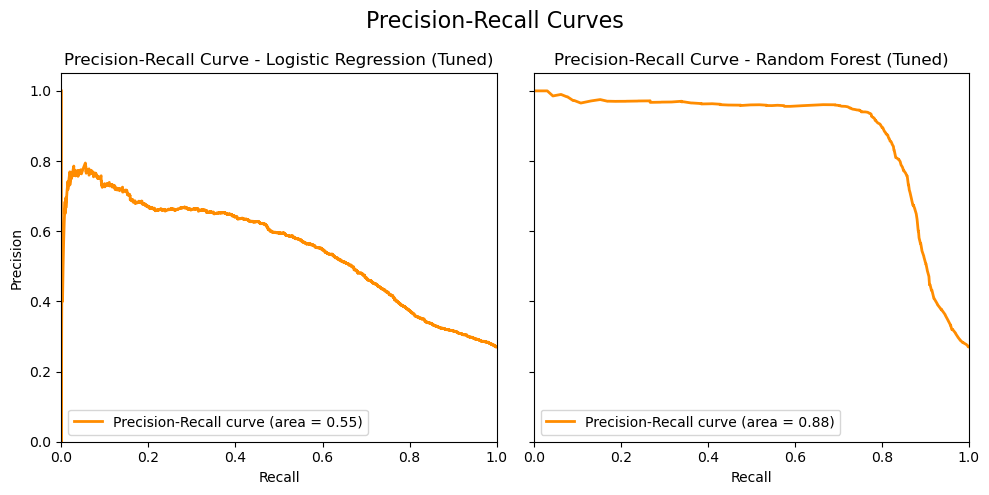

In [110]:
# Plot the Precision-Recall curve for the Logistic Regression model
fig, axs = plt.subplots(1,2, figsize=(10, 5), sharey=True)
fig.suptitle('Precision-Recall Curves', fontsize=16)
h = plot_precision_recall_curve(best_log_reg_model, X_test, y_test, 'Logistic Regression (Tuned)', (fig, axs[0]))

h = plot_precision_recall_curve(best_rf_model, X_test, y_test, 'Random Forest (Tuned)', (fig, axs[1]))
h.gca().set_ylabel('')
plt.tight_layout()

From the plots, the LR model has poor performance simultaneously across *precision* and *recall* (*AUC=0.55*) when unsuccessfully identifying fraudulent (low recall) and valid claims flagged as fraud (low precision). The RF model scores significantly higher (*AUC=0.88*) and is better able to correctly identify fraud cases and prevent misclassification of valid claims (FPs).

Overall, the difference between model performance may be explained by LR assuming linear relationships between features and outcomes whilst the RF is able to captures hidden and more complex non-linear relationships that cannot be accounted for using LR. Additionally, RF inherently evaluates feature importance, allowing it to focus on the most relevant features for fraud detection, whilst LR treats all features equally unless additional techniques (e.g., regularisation) are applied.

### Model Feature Importances
The feature importance plot indicates preferential features when classifying claims and may improve and enhance classification performance when training across large datasets in time. Important features are those with the highest coefficients in a model and are useful for ensuring future datasets contain relevant information. The model features contributing the largest coefficients are plotted:

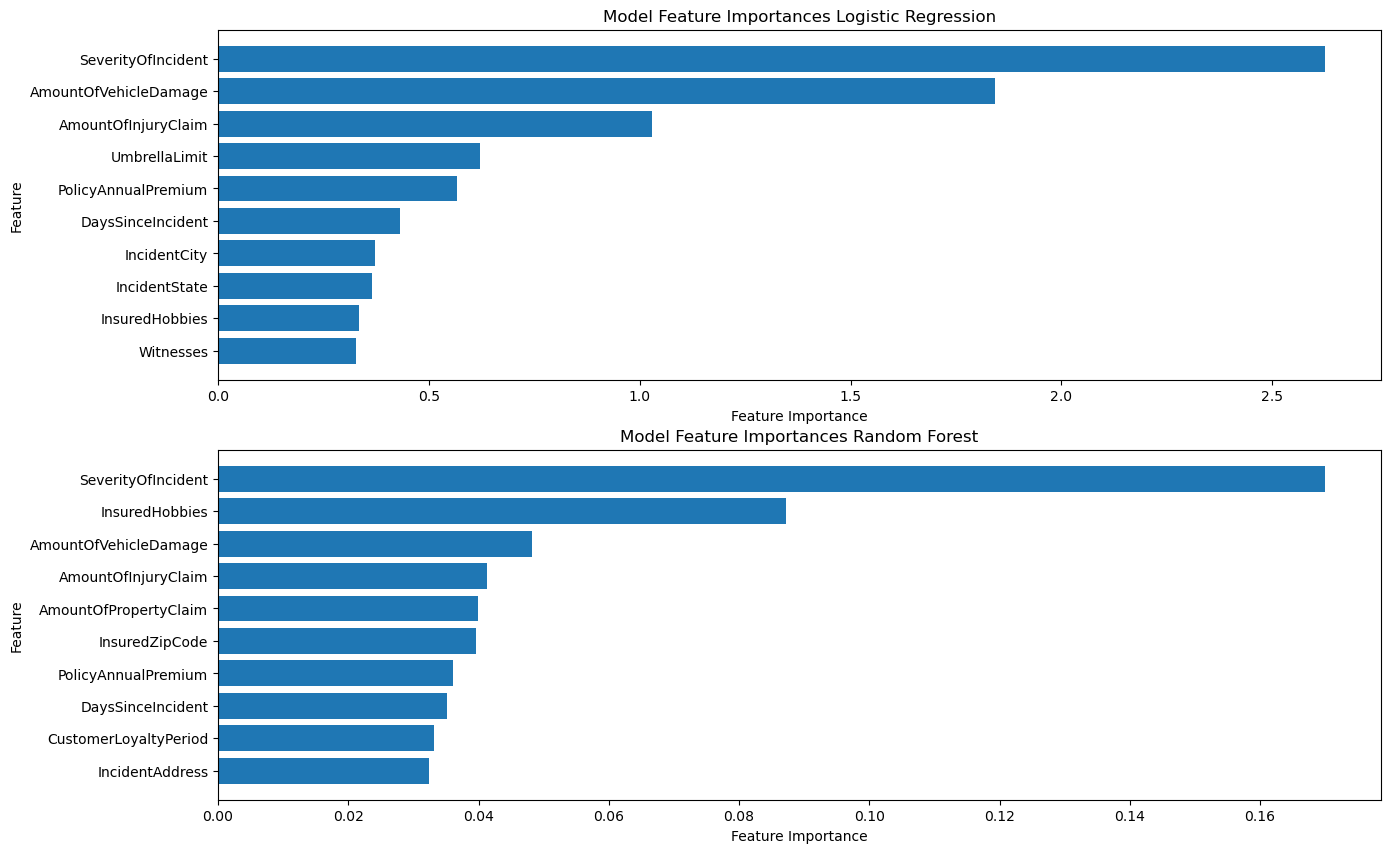

In [111]:
fig, axs = plt.subplots(2,1, figsize=(15,10))

plot_feature_importance(best_log_reg_model, X_train_oversampled.columns, top_n = 10, label='Logistic Regression',handle=(fig,axs[0]))
plot_feature_importance(best_rf_model, X_train_oversampled.columns,top_n = 10,  label='Random Forest', handle=(fig,axs[1]))

It is seen alongside previous correlation analysis that '*SeverityOfIncident*', '*AmountofVehicleDamage*'  are influential attribute across both models. Whilst '*AmountOfInjuryClaim* and '*InsuredHobbies*' are another distinguishing feature for LR and RF models respectively. Across both developed models, with the top ten feature considered, five features were observed to be the same:

1. Severity of incident
2. Amount of vehicle damage
3. Amount of injury claim
4. Policy annual premium
5. Days since incident

Both severity of incident and combination of claim amounts are dominant factors for determining fraud. Generally the incident location  across LR and RF models are relevant factors, but each model specifically utilises different attributes. The RF model, however, relies on the InsureHobbies feature, unlike the LR model that potentially requires further investigation.

### Model Impact to the Business

The final section reports the anticipated cost and impact to the business profitability forecasted ahead. The absolute value of all claim type costs are estimated due to prediction errors, using the confusion matrices obtained for the RF and LR model for predicted values using the testing dataset.


In [122]:
# Generate the confusion matrices for both the LR and RF models
conf_matrix_lr = confusion_matrix(y_test, best_log_reg_y_test_pred, normalize='all')
conf_matrix_rf = confusion_matrix(y_test, best_rf_y_test_pred, normalize='all')

# Perfect Prediction - Cost to Business
cost_invalid, cost_valid = calculateBusinessCost(trueNeg=1.0-pctFraud, falsePos=0.0,
                                                 falseNeg=0.0, truePos=0.0,
                                                 num_customers=total_customers)

# Logistic Regression - Cost to Business
cost_lr_invalid, cost_lr_valid = calculateBusinessCost(trueNeg=conf_matrix_lr[0,0], falsePos=conf_matrix_lr[0,1],
                                                       falseNeg=conf_matrix_lr[1,0],truePos=conf_matrix_lr[1,1],
                                                       num_customers=total_customers)

# Random Forest - Cost to Business
cost_rf_invalid, cost_rf_valid = calculateBusinessCost(trueNeg=conf_matrix_rf[0,0], falsePos=conf_matrix_rf[0,1],
                                                       falseNeg=conf_matrix_rf[1,0],truePos=conf_matrix_rf[1,1],
                                                       num_customers=total_customers)


**The revenue and profitability is forecasted ahead for ten years** to understand the effect of combined effect of losing customers on the business, with the overall anticipated number of claims, and their cost, are assumed to vary as a percentage of calculated total annual customers remaining in time. This is a simple assumption, but the cost model attempts to account for long-terms effects when misclassifying valid claims fraudulent (FPs).

In [123]:

revenue_lr, costs_lr, num_cust_lr = calculateRevenue(trueNeg=conf_matrix_lr[0,0], falsePos=conf_matrix_lr[0,1],
                             falseNeg=conf_matrix_lr[1,0], truePos=conf_matrix_lr[1,1], years=10)

revenue_rf, costs_rf, num_cust_rf = calculateRevenue(trueNeg=conf_matrix_rf[0,0], falsePos=conf_matrix_rf[0,1],
                             falseNeg=conf_matrix_rf[1,0],truePos=conf_matrix_rf[1,1], years=10)

# Calculate the forecasted gross profits
gross_profits_lr  = np.array(revenue_lr)- np.array(costs_lr).sum(axis=1)
gross_profits_rf = np.array(revenue_rf) - np.array(costs_rf).sum(axis=1)

costs= {'invalid': [cost_invalid,cost_lr_invalid, cost_rf_invalid ],
        'valid': [cost_valid,cost_lr_valid, cost_rf_valid ]}

The final plots comparing the LR and RF models, showing the cost of all claims predicted for Year 1, compared against a 'perfect' prediction as a baseline. Also the projected forecast of the gross profit across a ten year window.

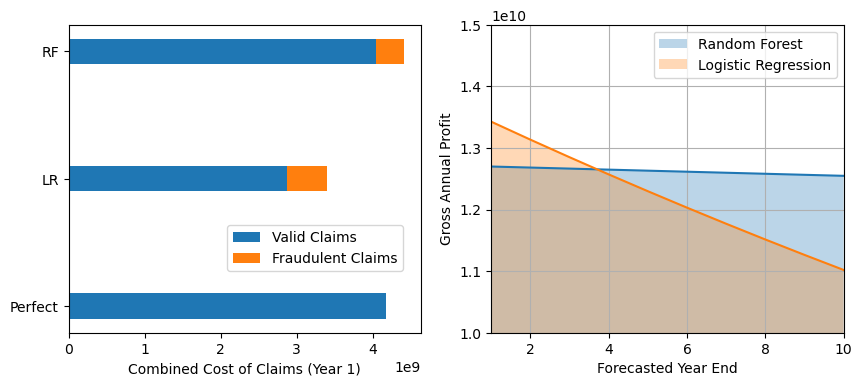

In [125]:
# plot a bar of chart
bottom = np.array([0,0,0])
fig,ax = plt.subplots(1,2, figsize=(10,4))

# Plot Costs
ax[0].barh(('Perfect', 'LR', 'RF'), costs['valid'],0.2, label='Valid Claims', left=bottom)
ax[0].barh(('Perfect', 'LR', 'RF'), costs['invalid'],0.2, label='Fraudulent Claims', left=costs['valid'])
ax[0].set_xlabel('Combined Cost of Claims (Year 1)')
ax[0].legend(loc=[0.45,0.2])

# Plot Profits
ax[1].fill_between(np.arange(1,11),gross_profits_rf, alpha=0.3,label='Random Forest')
ax[1].plot(np.arange(1,11),gross_profits_rf)
ax[1].fill_between(np.arange(1,11),gross_profits_lr, alpha=0.3,label='Logistic Regression')
ax[1].plot(np.arange(1,11),gross_profits_lr)

ax[1].legend(loc='upper right')
ax[1].set_xlabel('Forecasted Year End')
ax[1].set_xlim([1,10])
ax[1].set_ylim([1e10,1.5e10])
ax[1].set_ylabel('Gross Annual Profit')
ax[1].grid()

### Explanation of Model Impact on Businss 
With the LR model, the combined business cost is less than the perfect prediction baseline, and the RF model claim costs are greater than both the LR model and the baseline. This is due to a higher incident of FPs in the LR model, where valid claims flagged fraudulent are assumed in this model to not cost the company. The costs of the RF model are greater than the LR model, as these account for payouts to valid claims. The RF model exceeds the baseline, as FNs of accepted fraudulent claims that are paid out.

The company must be aware of the long-term impact on losing customers. Forecasting the loss of customers due to valid claims marked as fraudulent (100% conversion) reveals a different situation. Accounting for lost customers on total annual revenue generated, for the LM model, the overall gross profit decreases at a high rate compared to the RF model. After four years, choosing the RF model maintains a greater long term profitability. Ignoring complexities, the overall trend is that RF model is better suited for long-term sustainable profitability whilst simultaneously maintaining customer satisfaction and reputation.

Generally, the forecast makes many assumptions due to the lack of information on the cost model provided by the company. The cost of investigating claims are not accounted for, the conversion rate to lost customers is not truly known, and many assumptions are assumed fixed constants in time, such as average policy cost. Moreover, the pricing structure is simple, and does not account for various risk profile of different customers.

## 7. Final Recommendation of the Best Model

### Technical perspective

The Logistic Regression (LR) model is unsuitable for consideration by the company due to its overall poor performance binary classification of the classes across all metrics.

The Random Forest (RF) is more effective (MISSING) in detecting fraudulent cases (higher TP and lower FN), and significantly outperforms LR model when identifying valid claims (higher TNs and lower FPs). The PRC indicates that the RF model has a better balance (AUC=missing) between precision and recall when compared to the LR model (*AUC = 0.54*). This ensures especially there are fewer FPs (MISSING% vs. 23.5%), that ensures the business can maintain higher customer satisfaction, by minimising scrutiny of claims and, operational costs investigating valid claims.

The RF model's recall (80%) is low therefore there remains a significant proportion of fraudulent cases predicted as valid. Overall, the RF model balanced error rate is 12%, and shows the model has potential to achieve the company's target with further model development to address class imbalance, and acquiring more data from the fraudulent class.

### Business Perspective

Comparing the Logistic Regression model to the Random Forest model, there are greater combined claim cost due to increased payouts for all valid and invalid claims. However, long-term maintains profitability is maintained and surpassed the LR model from Year 4, when assuming customer are not lossed due to (FPs) - valid claims flagged as fraudulent. Even accounting for simple assumptions to the cost model, the increase cost due to payout of fraudulent claims can be compensated by changing the policy prices.

Crucially, the company's reputation and maintaining a long-term customer base can be considered a valuable asset, especially as the mean policy loyalty duration is 16.9 years. Beyond the data, the true long-term cost of detecting valid claims as fraudulent is not known, and higher order effects are not known. If not reduced and managed carefully could have more severe consquences on the business operations.

### Future Recommendations

Further development and evaluation of other models requires investigation such gradient boosting decision trees like XGBoost, to improve the detection of FNs in particular, that could not be accounted for even after hyperparameter tuning. In particular, addressing the class imbalance to mitigate overfitting should be resolved by considering other  techniques such as *SMOTE*. These provide a regularised technique of oversampling minority class data, that reduces the likeliood of overfitting, especially with decision tree based learning models. There were a substantial number of missing features for attributes, '*TypeOfCollission*', '*PropertyDamage*', '*PoliceReport*', which were filled using the modal value, but models regarded these as insigifnant features during training. Undersampling process would discard too much data, but further checks to confirm their relevance would be necessary.

The company could enrich their dataset to support training of the models to reduce error. For example, the data only accounts for a quarter of a year and could be extended in time, therefore including more fraudulent claims that will improve the training process. Moreover, the model remains biased to the limited timeframe of the dataset.

The feature importance lists have highlighted attributes that tend to improve prediction performance for fraud detection and the company could in future acquire related data features expanding on these (e.g. severity of the incident), which are just broad category descriptions. These alongside with feature engineering may improve any model's ability to differentiate fraudulent claims.

Finally, the company could provide more information regarding the cost model, or offer further assumptions to benchmark the models developed. This could be further costs to investigate fraud claims, conversion rates for losing customers, the history following claims made. This would be increasingly important when evaluating multiple models with similar accuarcy metrics in order to choose the model that improves the profitability of the business.


## 8. Conclusion

### Accomplishments

In this assignment, I have applied a rigorous methodological data pre-processing, based on guidance from the taught module content, to apply machine learning models (logistic regression and random forest) onto a complex collection of insurance datasets. The pre-processing included combining multiple data sources, cleaning of data and filling of empty data. This has been a useful excercise to address and understand the effect of class imbalance, and explore the challenges during training and its outcomes of a demanding realworld classification problem. Additionally, the metrics of each model during the training and testing phase were obtained, and these were careful interpreted especially in relation to the overall context of a business, where accuracy alone is insufficient to determine the performance of a machine learning model.

### Reflection

I would like to explore other machine models such as clustering, because Logistic Regression as a technique appeared relatively poor at prediction in this case study. If multiple models, could be explore, I would have a more systematic approach to automate the training and testing of model performance by taking advantage of the existing pipeline.

However, I expect that class imbalance issue has the most prominent influence on the prediction performance. I wish to consider other techniques to address class imbalance using other libraries e.g. ``imbalanced-learn`` that can use more sophisticated oversmapling techniques such as `SMOTE`, that could improve the overall model performance.

